# Notebook Description

This notebook is concerned with producing maps of the rainfall trends in the MJO phases (1-8) and the MJO subphases (enhanced, suppressed ect.).
<br>
This is done in the following order:
<ol>
    <li> AWAP and RMM data is loaded in. </li>
    <li> Data from start of year is moved to previous year, making resampling work for individual years.</li>
    <li> Data is split into different MJO phases (1-8). </li>
    <li> Indices (count and sum) are calculated for data. </li>
    <li> Phases are then compbined together to subphases.</li>
    <li> Trends then calculated for subphases.</li>
    
</ol>

# Packages

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array

import cartopy.crs as ccrs
import matplotlib.colors as colors
import datetime as dt
from matplotlib.colors import BoundaryNorm
rb = plt.cm.RdBu
bm = plt.cm.Blues
best_blue = '#9bc2d5'
recherche_red = '#fbc4aa'
wondeful_white = '#f8f8f7'
import glob
import pdb

import warnings
warnings.filterwarnings('ignore')

import matplotlib.gridspec as gridspec

In [2]:
import sys
from importlib import reload
sys.path.append('')

# This is for loading in all the data sets that have been used in this study.
import load_dataset as load

# For splitting all of the data sets into the different phases.
import phase_calc_functions as phase_calc

# Collection of functions for plotting MJO phases.
import phase_plot_functions as phase_plot
import miscellaneous#apply_masks

In [3]:
image_dir = '/g/data/w40/ab2313/images/mjo_and_rainfall_trend_images/'

# Data

In [4]:
# Loading awap
awap = load.load_awap()

# Loading RMM
rmm = load.load_rmm()

# Making sure the two are the same length
awap = awap.where(awap.time.isin(rmm.time.values), drop = True)
rmm = rmm.where(rmm.time.isin(awap.time.values), drop = True)
len(awap.time.values), len(rmm.time.values)

(6995, 6995)

In [5]:
awap

<xarray.Dataset>
Dimensions:  (time: 6995, lat: 81, lon: 173)
Coordinates:
  * time     (time) datetime64[ns] 1974-10-01 1974-10-02 ... 2020-03-31
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 112.0 112.2 112.5 112.8 ... 154.2 154.5 154.8 155.0
Data variables:
    precip   (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...
    History:      AGCD Regrid on the 11th of June 2021 from /g/data/rr5 by ab...

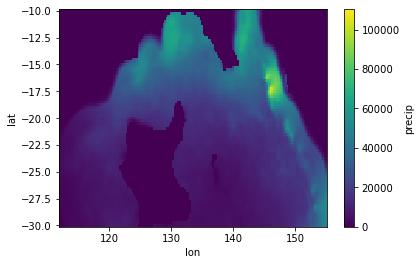

In [6]:
awap.sum(dim = 'time').precip.plot()

In [7]:
reload(miscellaneous)
awap = miscellaneous.apply_masks(awap)

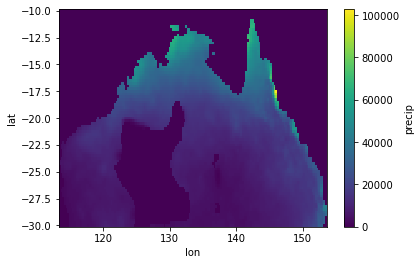

In [8]:
awap.sum(dim = 'time').precip.plot()

In [9]:
len(np.unique(awap.time.dt.year.values))

47

In [10]:
len(np.unique(rmm.time.dt.year.values))

47

In [11]:
awap

<xarray.Dataset>
Dimensions:  (time: 6995, lat: 80, lon: 161)
Coordinates:
  * time     (time) datetime64[ns] 1974-10-01 1974-10-02 ... 2020-03-31
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
Data variables:
    precip   (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...
    History:      AGCD Regrid on the 11th of June 2021 from /g/data/rr5 by ab...

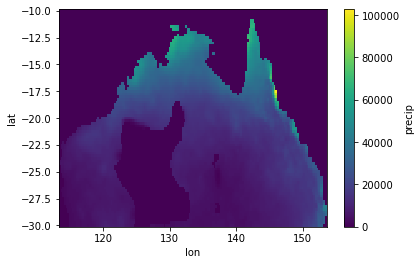

In [12]:
awap.sum(dim = 'time').precip.plot()

In [13]:
rmm

<xarray.Dataset>
Dimensions:    (time: 6995)
Coordinates:
  * time       (time) datetime64[ns] 1974-10-01 1974-10-02 ... 2020-03-31
Data variables:
    RMM1       (time) float64 0.5789 0.7589 0.8966 0.6736 ... 1.938 1.949 1.585
    RMM2       (time) float64 -0.9097 -0.9504 -0.5804 ... -0.7391 -0.4871
    phase      (time) float64 3.0 3.0 4.0 4.0 4.0 5.0 ... 4.0 4.0 4.0 4.0 4.0
    amplitude  (time) float64 1.078 1.216 1.068 0.7765 ... 2.073 2.085 1.659

# Phase Splitting and Wet Season Calibration

Splitting into different MJO phases (1-8) and then moving the data from Jan-March back one year. The moving of the data back one year means that all of the data for an individual wet season is now with in the one year. This makes resampling much easier.

In [14]:
# Readjusting the years, so when a resample takes plact, it is just the data for one wet season. If 
# this was not done it would be the end half of one wet season and the start of another. This moves that data
# from the start of the wet season back or forwards a year (I don't remember), so that they line up

phase_calc = reload(phase_calc)
awap_ws = phase_calc.wet_season_year(awap)

rmm_ws = phase_calc.wet_season_year(rmm)

# Splitting AWAP into the the different phases of the Wheeler and Hendon MJO
awap_split_ws = phase_calc.split_into_1to8(awap_ws, rmm_ws)

In [15]:
np.unique(awap.time.dt.year.values)

array([1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020])

In [16]:
np.unique(awap_ws.time.dt.year.values)

array([1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985,
       1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996,
       1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])

In [17]:
len(np.unique(awap_ws.time.dt.year.values))

46

In [18]:
# Checking out how many points there are in each year.
xr.ones_like(awap.isel(lat=0, lon=0)).resample(time='Y').count().precip.values

array([ 62, 152, 153, 152, 152, 152, 153, 152, 151, 152, 153, 152, 152,
       152, 153, 152, 152, 152, 153, 152, 152, 152, 153, 152, 152, 152,
       153, 152, 148, 152, 153, 152, 151, 152, 153, 152, 152, 152, 153,
       152, 151, 152, 153, 152, 152, 150,  91])

In [19]:
# Checking out how many points there are in each year.
xr.ones_like(awap_ws.isel(lat=0, lon=0)).resample(time='Y').count().precip.values

array([121, 122, 121, 121, 121, 122, 121, 121, 121, 122, 121, 121, 121,
       122, 121, 121, 121, 122, 121, 121, 121, 122, 121, 121, 121, 122,
       121, 121, 121, 122, 121, 121, 121, 122, 121, 121, 121, 122, 121,
       121, 121, 122, 121, 121, 121, 122])

In [20]:
awap_ws

<xarray.Dataset>
Dimensions:  (time: 5578, lat: 80, lon: 161)
Coordinates:
  * time     (time) datetime64[ns] 1975-01-01 1975-01-02 ... 2020-12-30
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
Data variables:
    precip   (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...
    History:      AGCD Regrid on the 11th of June 2021 from /g/data/rr5 by ab...

In [21]:
awap_split_ws

<xarray.Dataset>
Dimensions:  (time: 5532, lat: 80, lon: 161, phase: 9)
Coordinates:
  * time     (time) datetime64[ns] 1975-01-01 1975-01-02 ... 2020-12-30
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
Data variables:
    precip   (phase, time, lat, lon) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...
    History:      AGCD Regrid on the 11th of June 2021 from /g/data/rr5 by ab...

## Extreme Filter

If extreme != 0, then this will make the data set only contain rainfall that is greater than the qth percentile.

In [22]:
extreme = 0
q = 95

In [23]:
# Below the file gets overrided into an extreme file, this is for emergencies
awap_split_ws_origonal = awap_split_ws.copy(deep = True)

In [24]:
awap_split_ws = awap_split_ws_origonal

In [25]:
# The same functions below apply for extreme rainfall. Just changing the rainfall to only extremes here.
# THe ex-piece adds on to the tile, so they don't get saved as the same name

if extreme:

    threshold = awap_split_ws.reduce(np.nanpercentile, dim = 'time', q = q)
    awap_split_ws = awap_split_ws.where(awap_split_ws.precip >= threshold.precip)
    ex_piece = f'{q}th_percentile'
else:
    ex_piece = ''

In [26]:
# Removign the points outside of a range that is too big
def max_filter(data, vmax):
    data = data.where(data < vmax, vmax - 0.01)
    data = data.where(data > -vmax, -vmax + 0.01)
    
    from miscellaneous import apply_masks
    data = apply_masks(data)
    
    return data

In [27]:
# Removign the points outside of a range that is too big
def min_filter(data, vmin):
    data = data.where(data > vmin, vmin + 0.01)
    
    from miscellaneous import apply_masks
    data = apply_masks(data)
    
    return data

# Count

## Resampling

Counting the number of days in each year in each phase

In [28]:
# Resampling: getting the number of raindays each year (each year is a wet season).
awap_count = awap_split_ws.resample(time = 'y').count(dim = 'time')

# The index needs to be changed to just the year. Other wise it will be the full date.
awap_count['time'] = awap_count.time.dt.year
awap_count = awap_count.rename({'time':'year'})

For convecting the trend to subphases. They can be summed across the relevant phases.

In [29]:
awap_count_sub = phase_calc.resample_phase_to_subphase(awap_count)

In [30]:
awap_count_sub 

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 4, year: 46)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2016 2017 2018 2019 2020
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) int64 0 0 0 0 0 0 3 4 3 ... 0 0 0 0 0 0 0 0

## Linear Trends

In [31]:
awap_count_sub

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 4, year: 46)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2016 2017 2018 2019 2020
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) int64 0 0 0 0 0 0 3 4 3 ... 0 0 0 0 0 0 0 0

In [32]:
awap_count_sub.precip

<xarray.DataArray 'precip' (phase: 4, year: 46, lat: 80, lon: 161)>
array([[[[ 0,  0,  0, ..., 11,  0,  0],
         [ 0,  0,  0, ..., 12, 13,  0],
         [ 0,  0,  0, ..., 12, 10,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 0,  0,  0, ..., 17,  0,  0],
         [ 0,  0,  0, ..., 16, 17,  0],
         [ 0,  0,  0, ..., 16, 14,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 0,  0,  0, ..., 11,  0,  0],
         [ 0,  0,  0, ..., 11, 13,  0],
         [ 0,  0,  0, ..., 13, 13,  0],
         ...,
...
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 0,  0,  0, ...,  9,  0,  0],
         [ 0,  0,  0, ...,  8,  9,  0],
         [ 0,  0,  0, ...,  6,  8,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 0,  0,  0, ..., 15,  0,  0],
         [ 0,  0,  0, ..., 12, 11,  0],
         [ 0,  0,  0, ..., 10, 14,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]]]])
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2016 2017 2018 2019 2020
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'

In [33]:
list(awap_count_sub.coords)

['lat', 'lon', 'year', 'phase']

In [34]:
# This is the raw trend, the data has not been normalised
phase_calc = reload(phase_calc)
trend_count_sub, trend_sig_count_sub, trend_percent_count_sub, trend_percent_sig_count_sub = \
    phase_calc.return_alltrendinfo_custom(awap_count_sub.precip)

data
<xarray.DataArray 'precip' (phase: 4, year: 46, lat: 80, lon: 161)>
array([[[[ 0,  0,  0, ..., 11,  0,  0],
         [ 0,  0,  0, ..., 12, 13,  0],
         [ 0,  0,  0, ..., 12, 10,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 0,  0,  0, ..., 17,  0,  0],
         [ 0,  0,  0, ..., 16, 17,  0],
         [ 0,  0,  0, ..., 16, 14,  0],
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 0,  0,  0, ..., 11,  0,  0],
         [ 0,  0,  0, ..., 11, 13,  0],
         [ 0,  0,  0, ..., 13, 13,  0],
         ...,
...
         ...,
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0],
         [ 0,  0,  0, ...,  0,  0,  0]],

        [[ 0,  0,  0, ...,  9,  0,  0],
         [ 0,  0,  0, ...,  8,  9,  0],
         [ 0,  0,  0, ...,  6,  8,  0],
         ...,
       

In [35]:
trend_count_sub

<xarray.DataArray 'precip' (phase: 4, lat: 80, lon: 161)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.1924761 ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.19426457,
          0.21258094,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.19599137,
          0.19155103,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.07554733,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -0.06864015,
         -0.07523898,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -0.10749306,
         -0.06518656,  0.        ],
...
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ..., -0.14159729,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -0.12790626,
         -0.14720937,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -0.15689177,
         -0.14239901,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]])
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'

In [36]:
trend_count_sub.lon.values

array([113.5 , 113.75, 114.  , 114.25, 114.5 , 114.75, 115.  , 115.25,
       115.5 , 115.75, 116.  , 116.25, 116.5 , 116.75, 117.  , 117.25,
       117.5 , 117.75, 118.  , 118.25, 118.5 , 118.75, 119.  , 119.25,
       119.5 , 119.75, 120.  , 120.25, 120.5 , 120.75, 121.  , 121.25,
       121.5 , 121.75, 122.  , 122.25, 122.5 , 122.75, 123.  , 123.25,
       123.5 , 123.75, 124.  , 124.25, 124.5 , 124.75, 125.  , 125.25,
       125.5 , 125.75, 126.  , 126.25, 126.5 , 126.75, 127.  , 127.25,
       127.5 , 127.75, 128.  , 128.25, 128.5 , 128.75, 129.  , 129.25,
       129.5 , 129.75, 130.  , 130.25, 130.5 , 130.75, 131.  , 131.25,
       131.5 , 131.75, 132.  , 132.25, 132.5 , 132.75, 133.  , 133.25,
       133.5 , 133.75, 134.  , 134.25, 134.5 , 134.75, 135.  , 135.25,
       135.5 , 135.75, 136.  , 136.25, 136.5 , 136.75, 137.  , 137.25,
       137.5 , 137.75, 138.  , 138.25, 138.5 , 138.75, 139.  , 139.25,
       139.5 , 139.75, 140.  , 140.25, 140.5 , 140.75, 141.  , 141.25,
      

In [37]:
np.unique(np.diff(trend_count_sub.lon.values), return_counts = True)

(array([0.25]), array([160]))

In [38]:
trend_count_sub.lat.values

array([-30.  , -29.75, -29.5 , -29.25, -29.  , -28.75, -28.5 , -28.25,
       -28.  , -27.75, -27.5 , -27.25, -27.  , -26.75, -26.5 , -26.25,
       -26.  , -25.75, -25.5 , -25.25, -25.  , -24.75, -24.5 , -24.25,
       -24.  , -23.75, -23.5 , -23.25, -23.  , -22.75, -22.5 , -22.25,
       -22.  , -21.75, -21.5 , -21.25, -21.  , -20.75, -20.5 , -20.25,
       -20.  , -19.75, -19.5 , -19.25, -19.  , -18.75, -18.5 , -18.25,
       -18.  , -17.75, -17.5 , -17.25, -17.  , -16.75, -16.5 , -16.25,
       -16.  , -15.75, -15.5 , -15.25, -15.  , -14.75, -14.5 , -14.25,
       -14.  , -13.75, -13.5 , -13.25, -13.  , -12.75, -12.5 , -12.25,
       -12.  , -11.75, -11.5 , -11.25, -11.  , -10.5 , -10.25, -10.  ])

In [39]:
np.unique(np.diff(trend_count_sub.lat.values), return_counts = True)

(array([0.25, 0.5 ]), array([78,  1]))

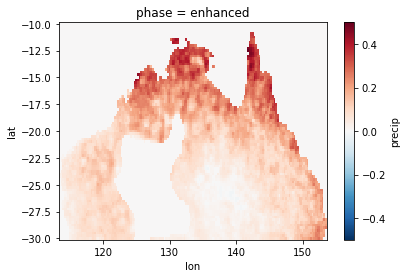

In [40]:
trend_count_sub.sel(phase = 'enhanced').plot()

In [41]:
# Trend that is normalised by the number of days in each phase

phase_calc = reload(phase_calc)
trend_count_sub_norm, trend_sig_count_sub_norm, trend_percent_count_sub_norm, trend_percent_sig_count_sub_norm = \
    phase_calc.return_alltrendinfo_custom(awap_count_sub.precip, normalise = 'subphase')

renaming time to year.
data
<xarray.DataArray (phase: 4, year: 46, lat: 80, lon: 161)>
array([[[[0.        , 0.        , 0.        , ..., 0.52380952,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.57142857,
          0.61904762, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.57142857,
          0.47619048, 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.        , 0.        , ..., 0.60714286,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.57142857,
          0.60714286, 0.        ],
         [0.        , 0.        , 0.        , ..., 0.57142857,
          0.5       , 0.        ],
...
         [0

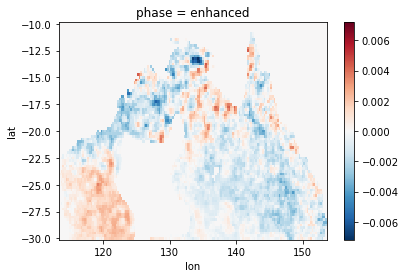

In [42]:
trend_count_sub_norm.sel(phase='enhanced').plot()

## Plots

In [43]:
import map_trend_functions as mapTrend

<div class="alert alert-block alert-success"> <center> <font color = 'black' size = "+1.5"> Subphases  </font></center></div>

In [44]:
vmax = 20
step = 4

In [45]:
# Making sure that it is on either side of the bounds, this trend is too big. THis is need or else the color bar
# may create the arrow extreneder which will add white to the colorbar and make it unbalanaced.
trend_percent_count_sub = max_filter(trend_percent_count_sub, vmax)

In [46]:
trend_percent_count_sub.sel(phase = 'enhanced')

<xarray.DataArray 'precip' (lat: 80, lon: 161)>
array([[        nan,         nan,         nan, ..., 14.25748906,
                nan,         nan],
       [        nan,         nan,         nan, ..., 15.6226752 ,
        15.69618524,         nan],
       [        nan,         nan,         nan, ..., 15.02600473,
        14.93448732,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
    phase    <U8 'enhanced'

In [47]:
# mapTrend = reload(mapTrend)
# mapTrend.trend_plot_single_phase(trend_percent_count_sub.sel(phase = 'enhanced').trend,
#                      stip_data = trend_percent_sig_count_sub.sel(phase = 'enhanced').trend,
#                vmax = vmax, step = step, sig_size = 4.5, cmap = 'BrBG',
#                title = 'count_all_unnorm_subphase'+ ex_piece, colorbar_title = 'Percent Per Decade'
# #                ,savedir = image_dir
#                )

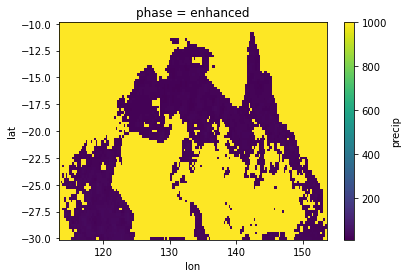

In [48]:
d = trend_percent_sig_count_sub.sel(phase = 'enhanced')
d.where(np.isfinite(d), 1000).plot()

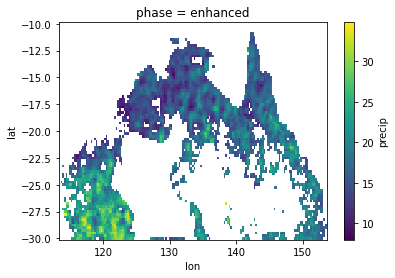

In [49]:
trend_percent_sig_count_sub.sel(phase = 'enhanced').plot()

[-20 -16 -12  -8  -4   0   4   8  12  16  20]


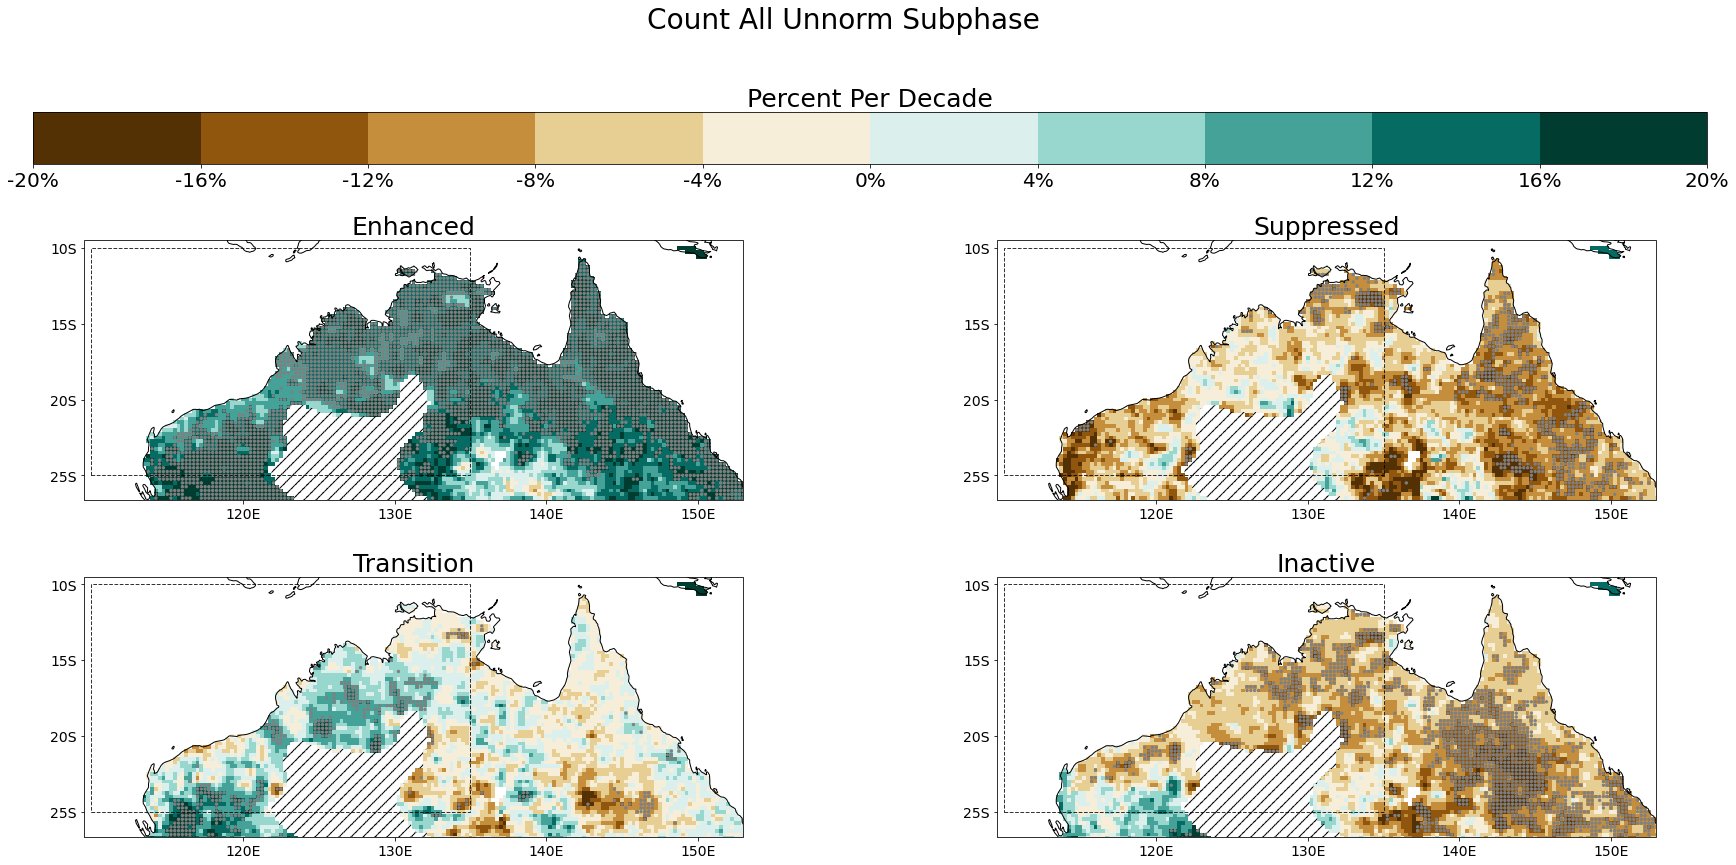

In [50]:
mapTrend = reload(mapTrend)
mapTrend.trend_plots(trend_percent_count_sub, stip_data = trend_percent_sig_count_sub,
               vmax = vmax, step = step, sig_size = 5.5, cmap = 'BrBG',
               title = 'count_all_unnorm_subphase'+ ex_piece, colorbar_title = 'Percent Per Decade'
#                ,savedir = image_dir
               )

In [51]:
# Making sure that it is on either side of the bounds, this trend is too big. THis is need or else the color bar
# may create the arrow extreneder which will add white to the colorbar and make it unbalanaced.
trend_percent_count_sub_norm = max_filter(trend_percent_count_sub_norm, vmax)

In [52]:
trend_percent_count_sub_norm.phase.values

array(['enhanced', 'suppressed', 'transition', 'inactive'], dtype=object)

[-20 -16 -12  -8  -4   0   4   8  12  16  20]


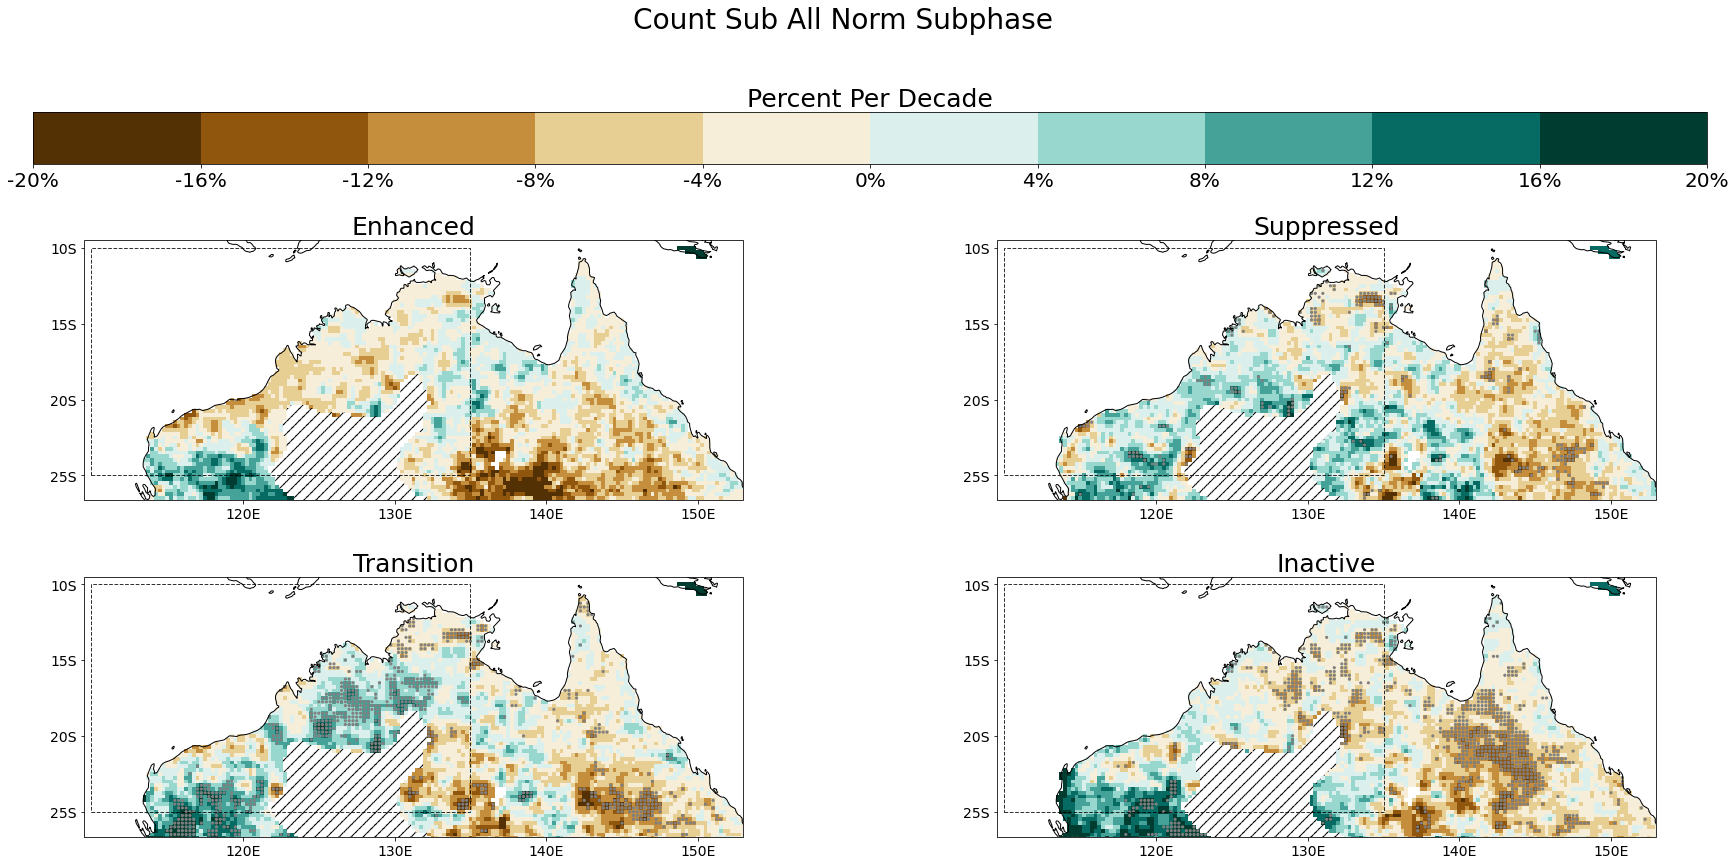

In [53]:
mapTrend = reload(mapTrend)
mapTrend.trend_plots(trend_percent_count_sub_norm, stip_data = trend_percent_sig_count_sub_norm,
               vmax = vmax, step = step, sig_size = 4.5, cmap = 'BrBG',
               title = 'count_sub_all_norm_subphase'+ ex_piece, colorbar_title = 'Percent Per Decade'
#                ,savedir = image_dir
            )

# Sum

<div class="alert alert-block alert-success"> <center> <font color = 'black' size = "+1.5"> Phases  </font></center></div>

In [54]:
def awap_resample_sum(awap):
    awap_resampled = awap.resample(time = 'y').sum(dim = 'time')
    awap_resampled['time'] = awap_resampled.time.dt.year
    awap_resampled = awap_resampled.rename({'time':'year'})
    
    return awap_resampled

In [55]:
awap_sum = awap_resample_sum(awap_split_ws_origonal)

In [56]:
awap_sum

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, year: 46, phase: 9)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * phase    (phase) object '1' '2' '3' '4' '5' '6' '7' '8' 'inactive'
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2016 2017 2018 2019 2020
Data variables:
    precip   (year, phase, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...
    History:      AGCD Regrid on the 11th of June 2021 from /g/data/rr5 by ab...

In [57]:
awap_sum_sub = phase_calc.resample_phase_to_subphase(awap_sum)

<div class="alert alert-block alert-success"> <center> <font color = 'black' size = "+1.5"> Subphases  </font></center></div>

In [58]:
phase_calc = reload(phase_calc)
trend_sum_sub, trend_sig_sum_sub, trend_percent_sum_sub, trend_percent_sig_sum_sub = \
    phase_calc.return_alltrendinfo_custom(awap_sum_sub.precip)

data
<xarray.DataArray 'precip' (phase: 4, year: 46, lat: 80, lon: 161)>
array([[[[  0.        ,   0.        ,   0.        , ...,  74.51210734,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,  73.16977333,
           64.0974518 ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,  71.4598687 ,
           69.08600262,   0.        ],
         ...,
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ...,   0.        ,
            0.        ,   0.        ]],

        [[  0.        ,   0.        ,   0.        , ..., 253.97192255,
            0.        ,   0.        ],
         [  0.        ,   0.        ,   0.        , ..., 196.18399974,
          208.2239307 ,   0.        ],
         [  0.        ,   0.   

In [59]:
phase_calc = reload(phase_calc)
trend_sum_sub_norm, trend_sig_sum_sub_norm, trend_percent_sum_sub_norm, trend_percent_sig_sum_sub_norm = \
    phase_calc.return_alltrendinfo_custom(awap_sum_sub.precip, normalise = 'subphase')

renaming time to year.
data
<xarray.DataArray (phase: 4, year: 46, lat: 80, lon: 161)>
array([[[[ 0.        ,  0.        ,  0.        , ...,  3.54819559,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  3.48427492,
           3.05225961,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  3.40285089,
           3.28980965,  0.        ],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  9.07042581,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  7.00657142,
           7.43656895,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  6.96489777

# Intensity 
This is just the total rainfall (awap_sum_sub) by the total number of raindays (awap_count_sub)

In [60]:
awap_sum_sub

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 4, year: 46)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2016 2017 2018 2019 2020
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

In [61]:
awap_count_sub

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 4, year: 46)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2016 2017 2018 2019 2020
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) int64 0 0 0 0 0 0 3 4 3 ... 0 0 0 0 0 0 0 0

In [62]:
awap_int_sub = awap_sum_sub/awap_count_sub
awap_int_sub

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, year: 46, phase: 4)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * year     (year) int64 1975 1976 1977 1978 1979 ... 2016 2017 2018 2019 2020
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, year, lat, lon) float64 nan nan nan nan ... nan nan nan nan

In [63]:
phase_calc = reload(phase_calc)
trend_int_sub, trend_sig_int_sub, trend_percent_int_sub, trend_percent_sig_int_sub = \
    phase_calc.return_alltrendinfo_custom(awap_int_sub.precip)

data
<xarray.DataArray 'precip' (phase: 4, year: 46, lat: 80, lon: 161)>
array([[[[        nan,         nan,         nan, ...,  6.77382794,
                  nan,         nan],
         [        nan,         nan,         nan, ...,  6.09748111,
           4.93057322,         nan],
         [        nan,         nan,         nan, ...,  5.95498906,
           6.90860026,         nan],
         ...,
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan],
         [        nan,         nan,         nan, ...,         nan,
                  nan,         nan]],

        [[        nan,         nan,         nan, ..., 14.93952486,
                  nan,         nan],
         [        nan,         nan,         nan, ..., 12.26149998,
          12.24846651,         nan],
         [        nan,         nan,         nan, ..., 12.1885711 ,
          13

[-35 -30 -25 -20 -15 -10  -5   0   5  10  15  20  25  30  35]
Saving to /g/data/w40/ab2313/images/mjo_and_rainfall_trend_images/final_rainfall_per_rainday_01.png


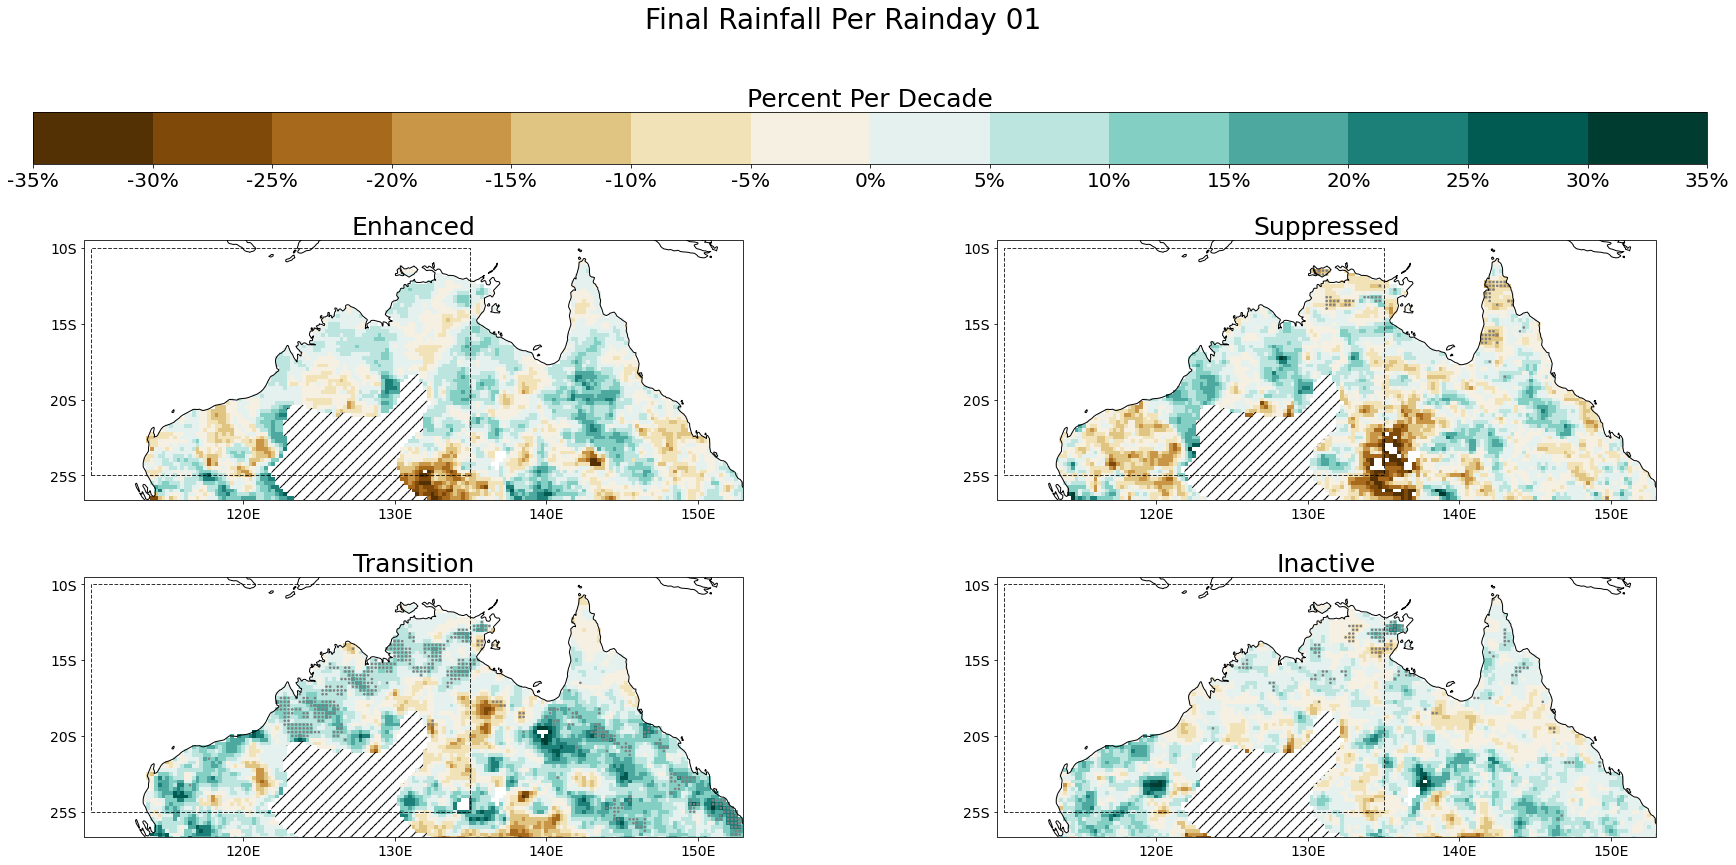

In [64]:
mapTrend = reload(mapTrend)

mapTrend.trend_plots(trend_percent_int_sub, stip_data = trend_percent_sig_int_sub, vmax = 35, step = 5,
                       title = 'final_rainfall_per_rainday_01', colorbar_title = 'Percent Per Decade',
                       cmap = 'BrBG'
                      ,savedir = image_dir
                       )

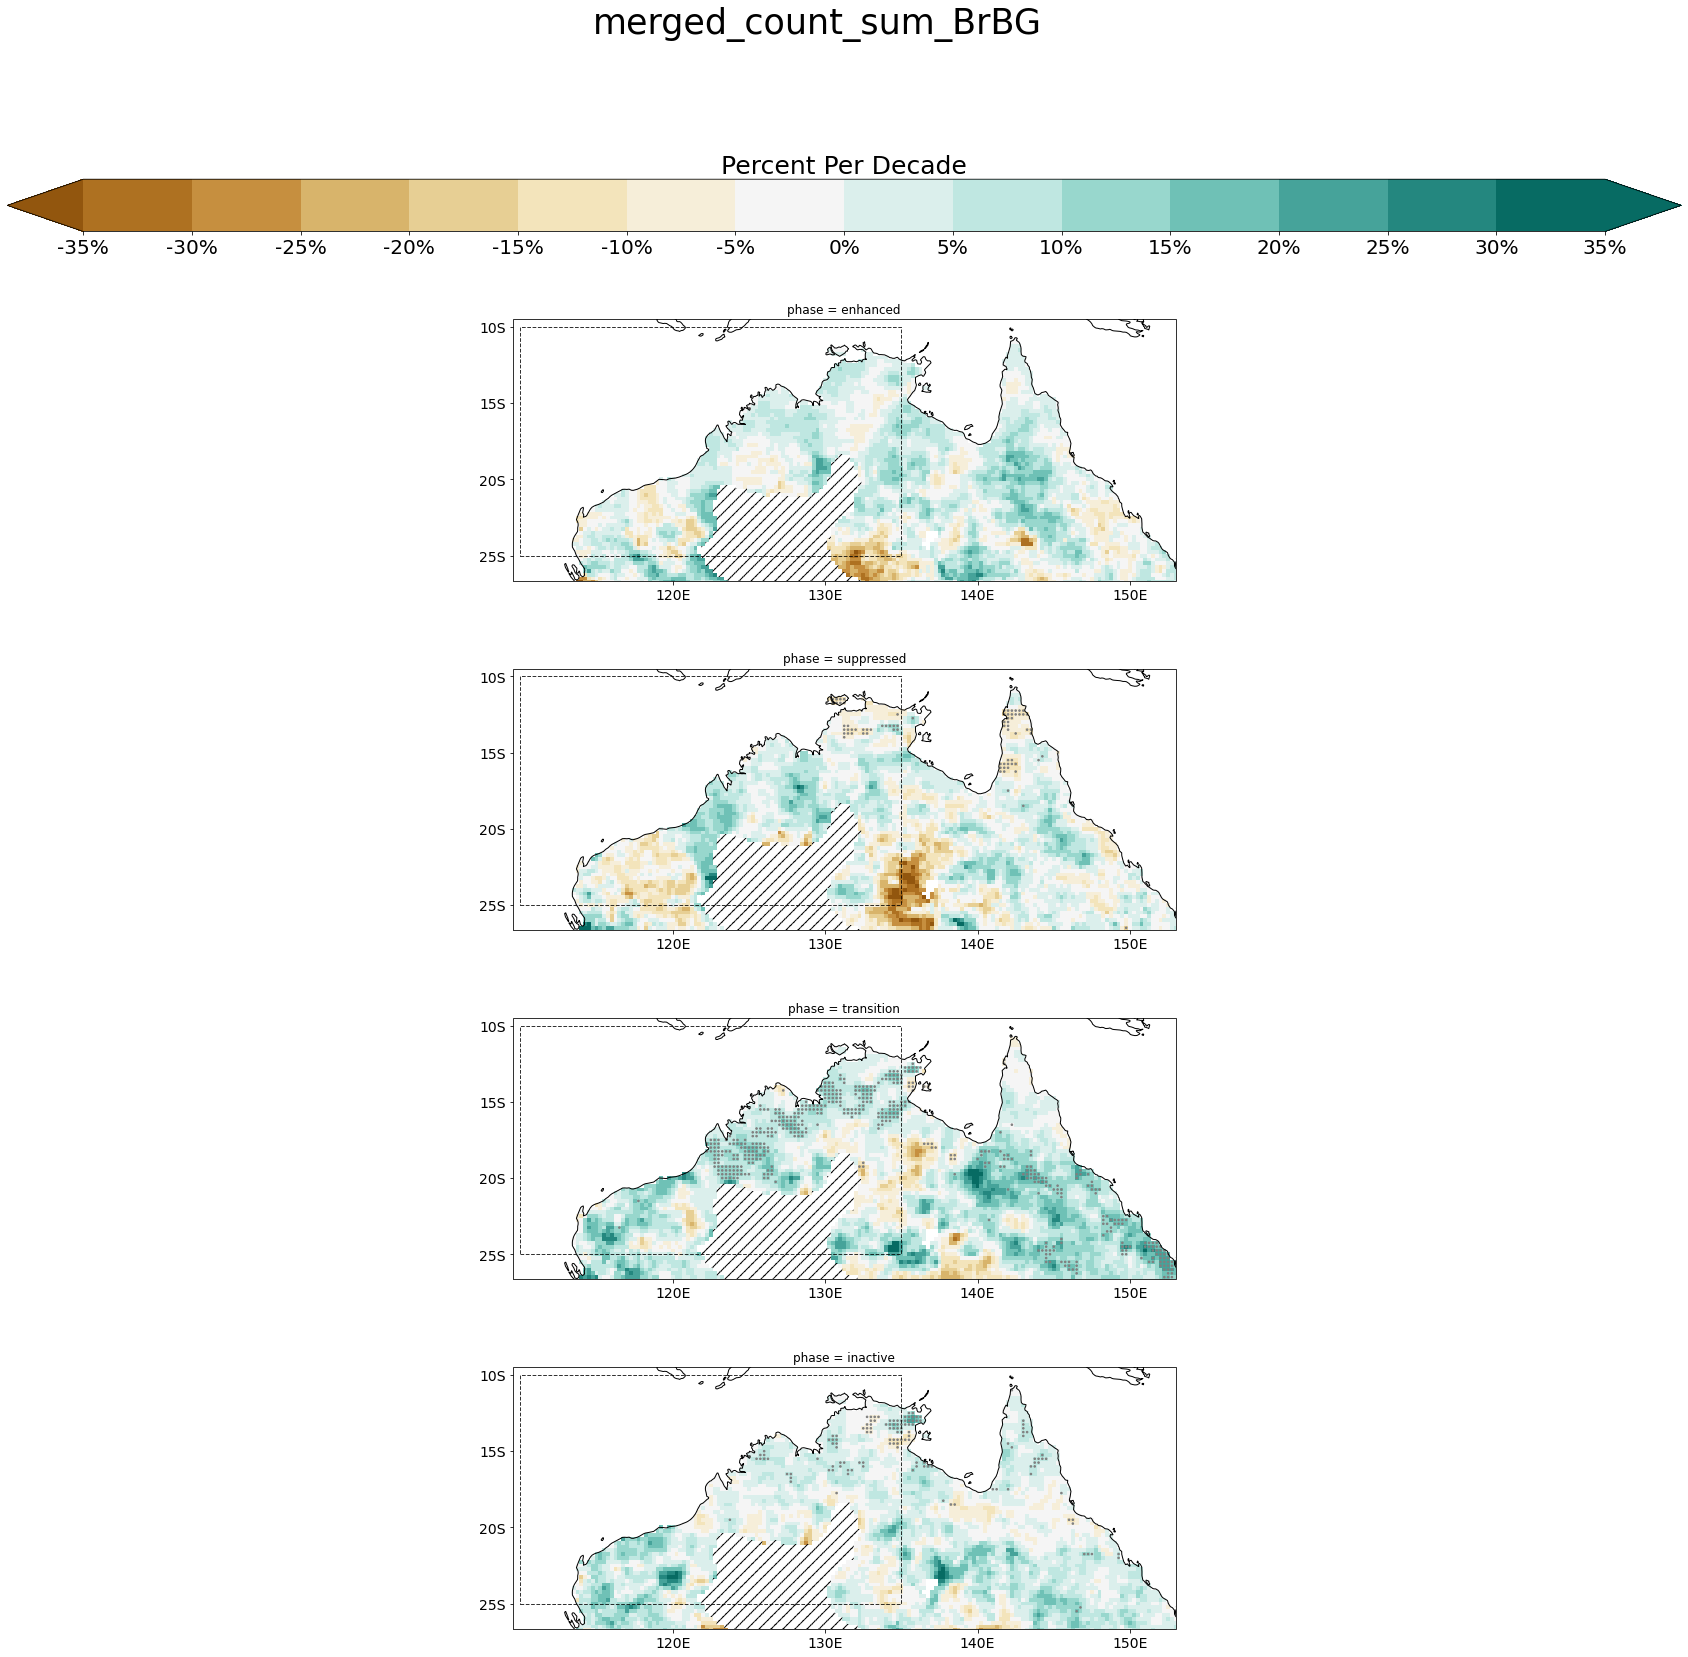

In [65]:
mapTrend = reload(mapTrend)

mapTrend.trend_plots_vertical(trend_percent_int_sub, stip_data = trend_percent_sig_int_sub, vmax = 35, step = 5,
                       title = 'merged_count_sum_BrBG', colorbar_title = 'Percent Per Decade',
                       cmap = 'BrBG'
#                       ,savedir = image_dir
                       )

## Plots

<div class="alert alert-block alert-success"> <center> <font color = 'black' size = "+1.5"> Subphases  </font></center></div>

In [66]:
vmax = 25
step = 5

In [67]:
# Making sure that it is on either side of the bounds, this trend is too big. THis is need or else the color bar
# may create the arrow extreneder which will add white to the colorbar and make it unbalanaced.
trend_percent_sum_sub = max_filter(trend_percent_sum_sub, vmax)

[-25 -20 -15 -10  -5   0   5  10  15  20  25]


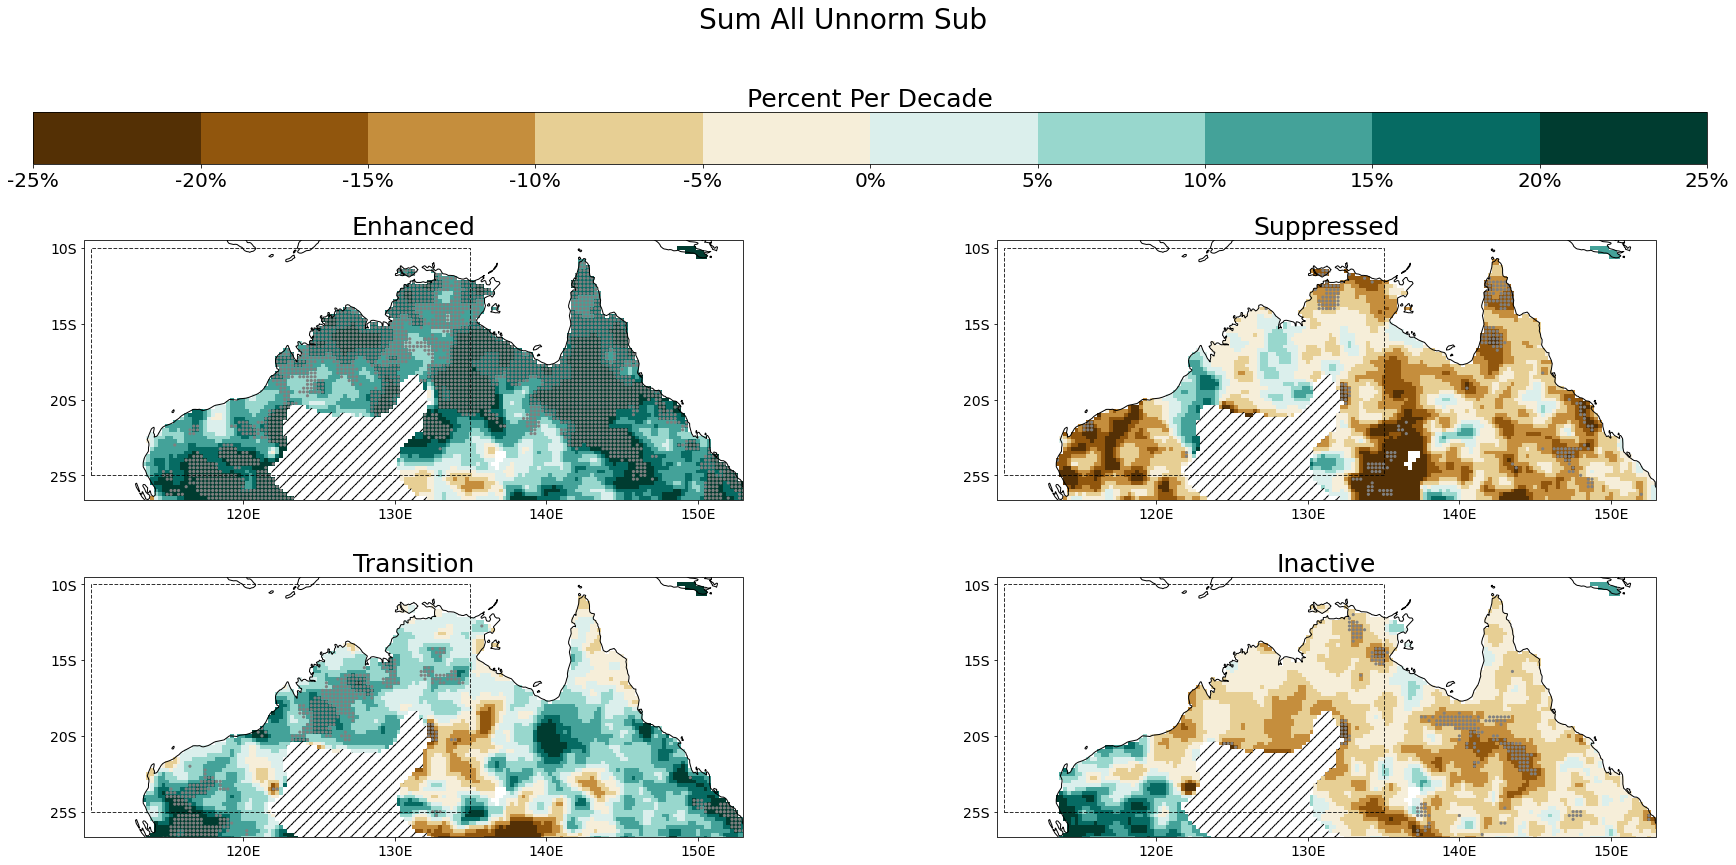

In [68]:
mapTrend = reload(mapTrend)
mapTrend.trend_plots(trend_percent_sum_sub, stip_data = trend_percent_sig_sum_sub,
                vmax = vmax, step = step, sig_size = 4.5, cmap = 'BrBG',
               title = 'sum_all_unnorm_sub'+ ex_piece, colorbar_title = 'Percent Per Decade',
#                savedir = savedir
               )

In [69]:
# Making sure that it is on either side of the bounds, this trend is too big. THis is need or else the color bar
# may create the arrow extreneder which will add white to the colorbar and make it unbalanaced.
trend_percent_sum_sub_norm = max_filter(trend_percent_sum_sub_norm, vmax)

[-25 -20 -15 -10  -5   0   5  10  15  20  25]


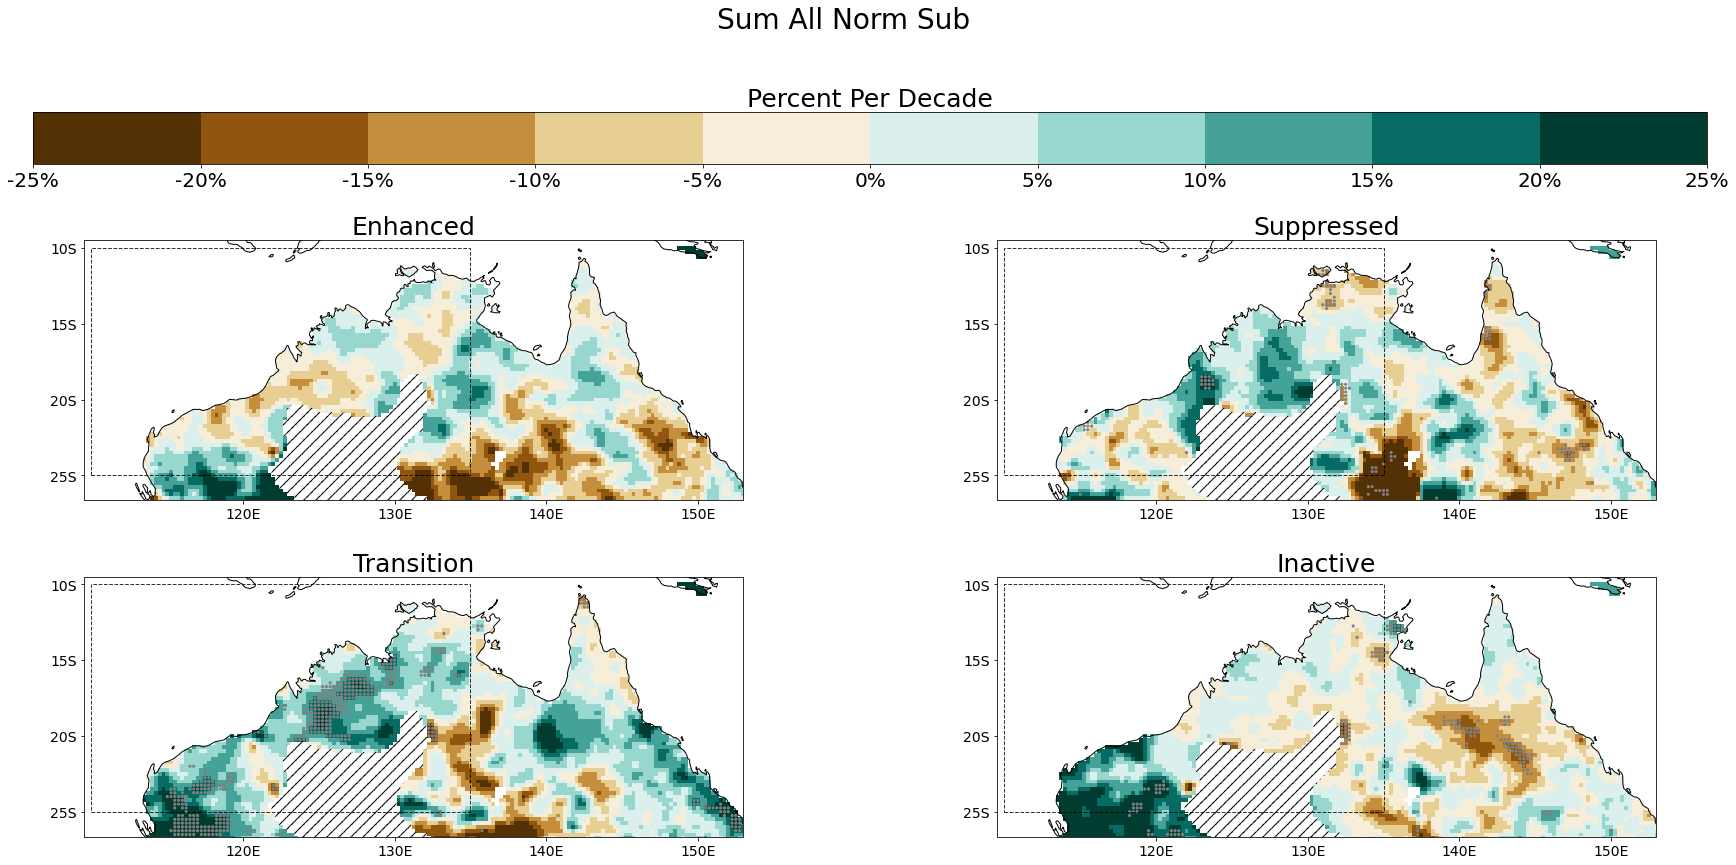

In [70]:
mapTrend = reload(mapTrend)
mapTrend.trend_plots(trend_percent_sum_sub_norm, stip_data = trend_percent_sig_sum_sub_norm,
               vmax = vmax, step = step, sig_size = 4.5, cmap = 'BrBG',
               title = 'sum_all_norm_sub'+ ex_piece, colorbar_title = 'Percent Per Decade',
#                savedir = savedir
               )

# Combined Plot - Count and Sum

GRL only allows a max of four figures. Thus I am combining the plots together

In [71]:
# Mergind the data sets together so that only two data sets need to be read into the function and not
# four. These can then be itterated through using a for loop (for index in data:)


# The unormalised data.
merged_count_sum =\
        xr.merge([trend_percent_count_sub.to_dataset(name='count'), 
                  trend_percent_sum_sub.to_dataset(name='sum')])

stip_count_sum = xr.merge([trend_percent_sig_count_sub.to_dataset(name='count'),
          trend_percent_sig_sum_sub.to_dataset(name='sum')])

merged_count_sum_norm =\
        xr.merge([trend_percent_count_sub_norm.to_dataset(name='count'), 
                  trend_percent_sum_sub_norm.to_dataset(name='sum')])

stip_count_sum_norm  = xr.merge([trend_percent_sig_count_sub_norm.to_dataset(name='count'),
          trend_percent_sig_sum_sub_norm.to_dataset(name='sum')])

In [72]:
merged_count_sum

<xarray.Dataset>
Dimensions:  (lat: 80, lon: 161, phase: 4)
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    count    (phase, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
    sum      (phase, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan

In [73]:
reload(load)
reload(mapTrend)

<module 'map_trend_functions' from '/home/563/ab2313/Documents/mjo_and_rainfall_trend/map_trend_functions.py'>

0 count (80, 161) (80, 161) (80, 161)
1 sum (80, 161) (80, 161) (80, 161)


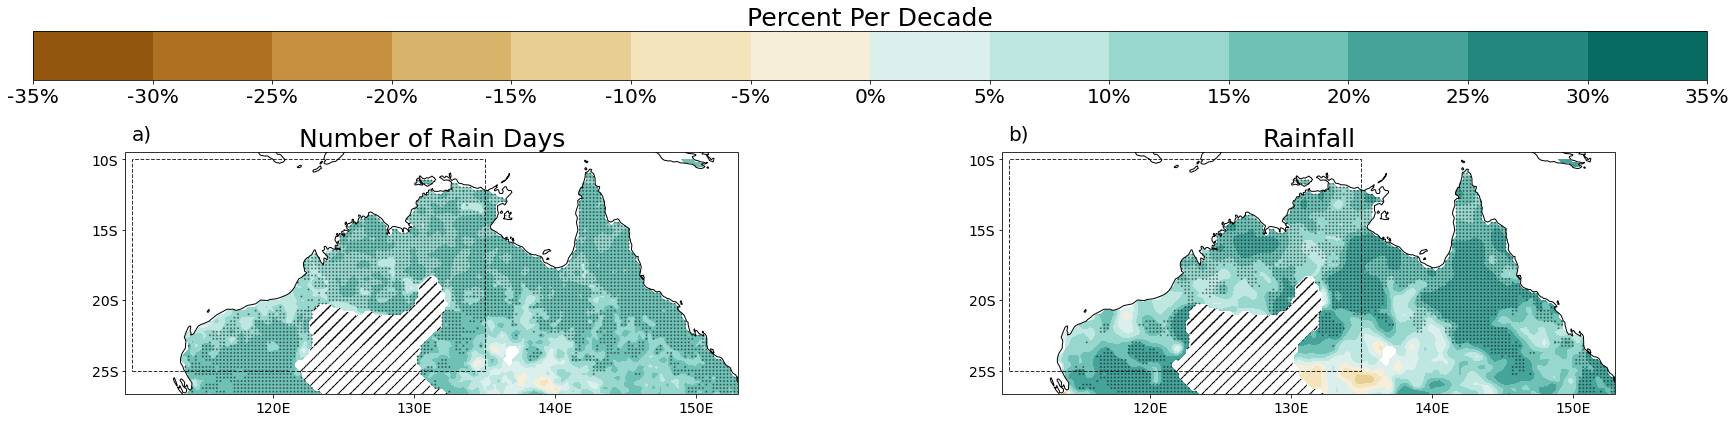

In [74]:

mapTrend.trend_plot_combined_single_phase(merged_count_sum.sel(phase = 'enhanced'),
                             stip_data = stip_count_sum.sel(phase = 'enhanced'), vmax = 35, step = 5,
                       title = 'merged_count_sum_enhanced_BrBG', colorbar_title = 'Percent Per Decade',
                                    phase = 'enhanced', cmap = 'BrBG'
#                        ,savedir = image_dir
                       )

In [75]:
image_dir

'/g/data/w40/ab2313/images/mjo_and_rainfall_trend_images/'

4


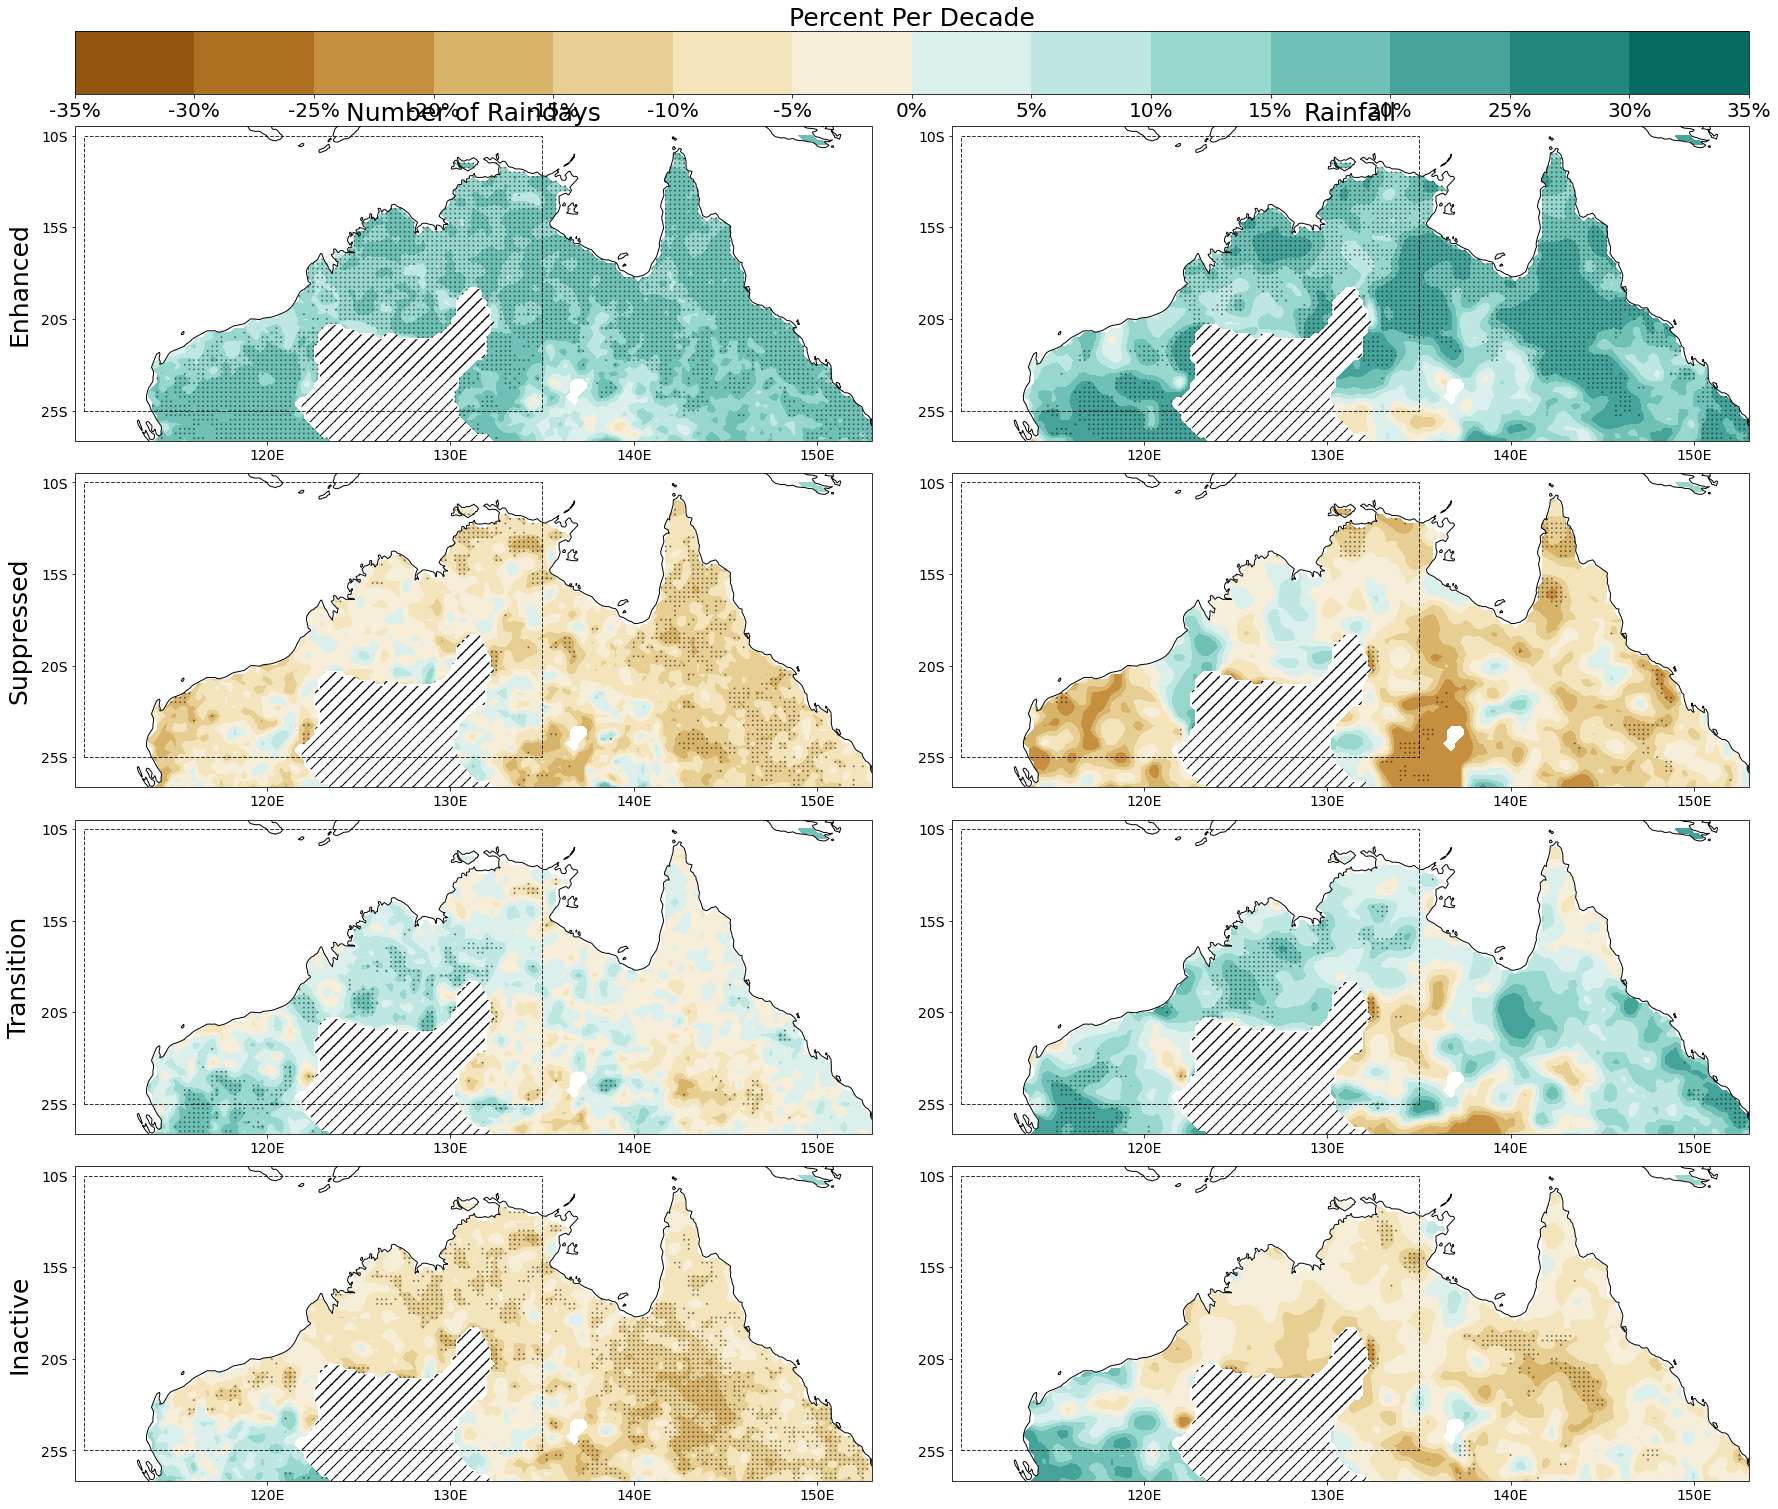

In [76]:
mapTrend = reload(mapTrend)

mapTrend.trend_plot_combined_better(merged_count_sum, stip_data = stip_count_sum, vmax = 35, step = 5,
                       title = 'merged_count_sum_BrBG', colorbar_title = 'Percent Per Decade',
                       cmap = 'BrBG'
#                       ,savedir = image_dir
                       )

0 count (80, 161) (80, 161) (80, 161)
1 sum (80, 161) (80, 161) (80, 161)


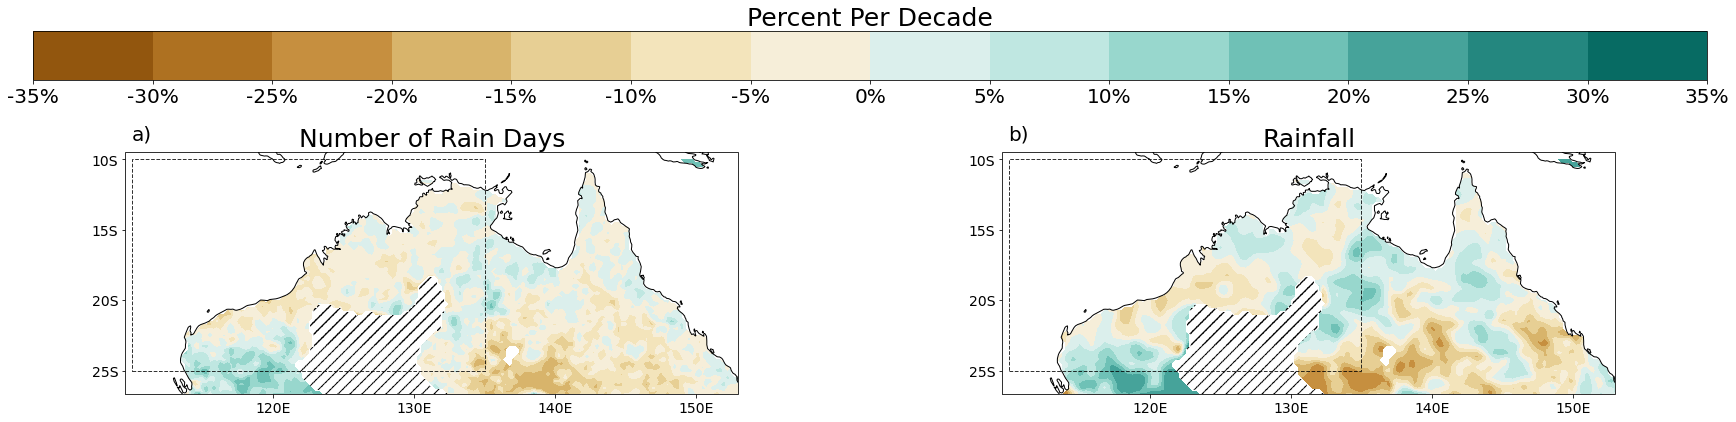

In [77]:
mapTrend = reload(mapTrend)

mapTrend.trend_plot_combined_single_phase(merged_count_sum_norm.sel(phase = 'enhanced'),
                             stip_data = stip_count_sum_norm.sel(phase = 'enhanced'), vmax = 35, step = 5,
                       title = 'merged_count_sum_norm_enhanced_BrBG', colorbar_title = 'Percent Per Decade',
                                    phase = 'enhanced', cmap = 'BrBG'
#                        ,savedir = image_dir
                       )

4


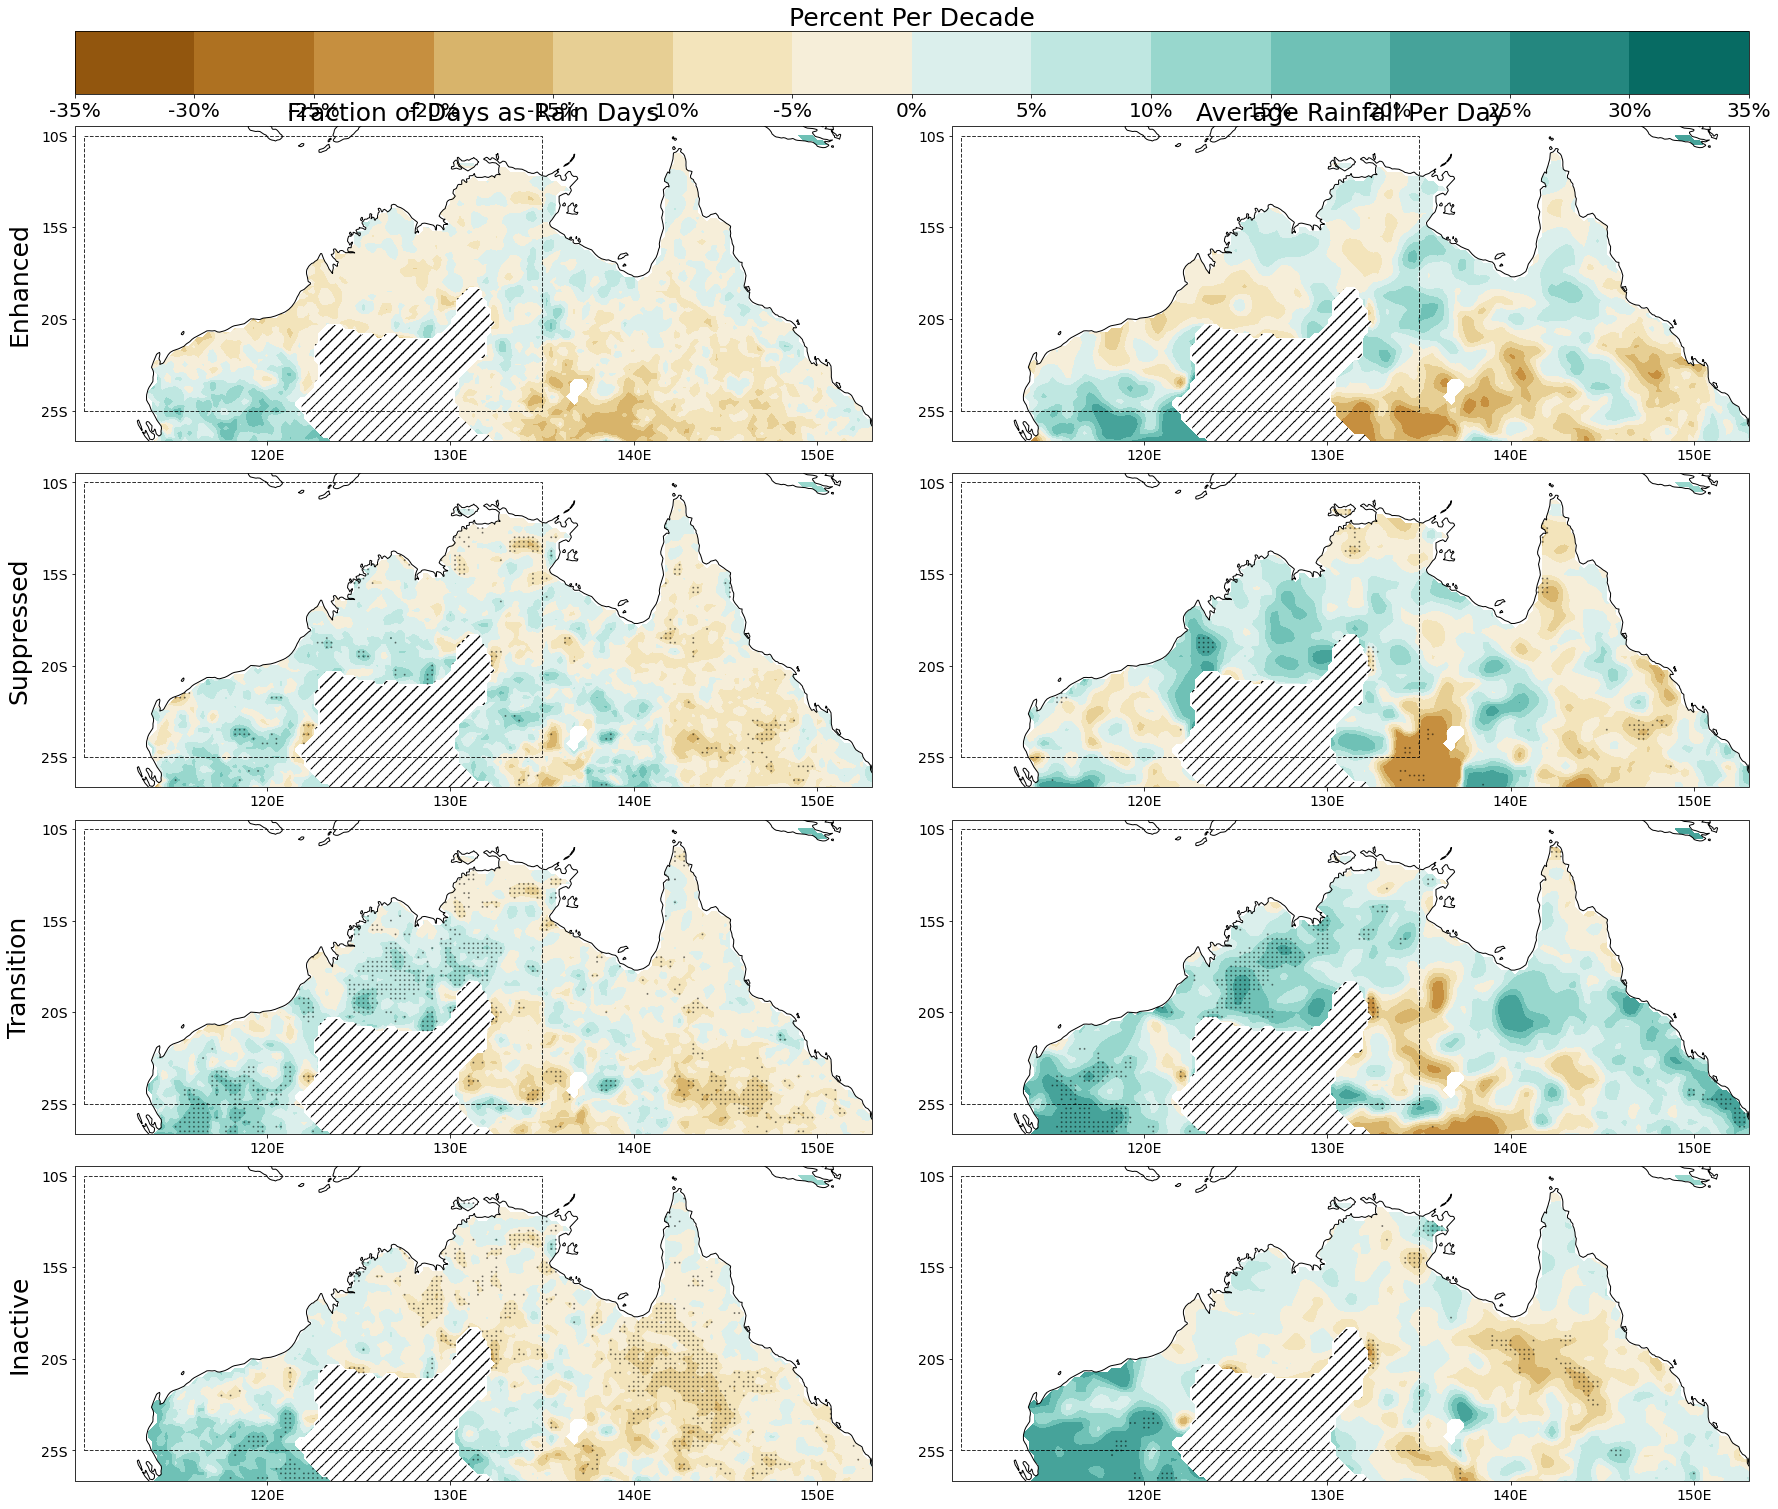

In [78]:
mapTrend = reload(mapTrend)
mapTrend.trend_plot_combined_better(merged_count_sum_norm , stip_data = stip_count_sum_norm ,
                                    vmax = 35, step = 5,
                       title = 'final_all_norm_01', colorbar_title = 'Percent Per Decade',
                        col_titles = ['Fraction of Days as Rain Days', 'Average Rainfall Per Day'],
                        cmap = 'BrBG'
                       ,savedir = image_dir
                       )

# Fraction  of Total Trend

This code compares the fraction of the trend in the enhanced phase to the trend overall to get an estimate of the total trend.

In [79]:
trend_sum_sub

<xarray.DataArray 'precip' (phase: 4, lat: 80, lon: 161)>
array([[[ 0.        ,  0.        ,  0.        , ...,  4.42230791,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  3.83097345,
          3.87279967,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  3.15035466,
          2.88581129,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ..., -1.66680414,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -1.3206362 ,
         -1.4864754 ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -1.69412182,
         -1.72545759,  0.        ],
...
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.11313248,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -0.39276287,
          0.41336504,  0.        ],
        [ 0.        ,  0.        ,  0.        , ..., -0.67352618,
          0.10138785,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]])
Coordinates:
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'

## Total Trend Calc

In [80]:
awap

<xarray.Dataset>
Dimensions:  (time: 6995, lat: 80, lon: 161)
Coordinates:
  * time     (time) datetime64[ns] 1974-10-01 1974-10-02 ... 2020-03-31
  * lat      (lat) float64 -30.0 -29.75 -29.5 -29.25 ... -10.5 -10.25 -10.0
  * lon      (lon) float64 113.5 113.8 114.0 114.2 ... 152.8 153.0 153.2 153.5
Data variables:
    precip   (time, lat, lon) float64 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...
    History:      AGCD Regrid on the 11th of June 2021 from /g/data/rr5 by ab...

In [81]:
years = np.unique(awap.time.dt.year.values)
years

array([1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020])

In [82]:
len(years)

47

From this we can see that there has been 47 years. However, the 2020 year is just the end of a wet season (or 1974 is just the start of a wet seaosn). So this is only 46 wet seasons.

In [ ]:

# Moving the start of the wet season to the next year so the yearly resampling works.
# This means that 1975 is 1974/1975 and 2020 is 2019/2020
awap_ws = phase_calc.wet_season_year(awap)
rmm_ws = phase_calc.wet_season_year(rmm)

# Splitting AWAP into the the different phases of the Wheeler and Hendon MJO
awap_split_ws = phase_calc.split_into_1to8(awap_ws, rmm_ws)

In [ ]:
len(np.unique(awap_split_ws.time.dt.year.values))

In [ ]:
np.unique(awap_split_ws.time.dt.year.values)[:23]

In [ ]:
np.unique(awap_split_ws.time.dt.year.values)[23:]

In [ ]:
print(len(np.unique(awap_split_ws.time.dt.year.values)[:23]), 
len(np.unique(awap_split_ws.time.dt.year.values)[23:]))

In [ ]:
np.unique(awap_split_ws.time.dt.year.values)

In [ ]:
def count_resample(awap_data):
    # countring the rainfall events in each Wheeler and Hendon Phase
    awap_count = awap_data.resample(time = 'y').count(dim = 'time')
    awap_count['time'] = awap_count.time.dt.year
    awap_count = awap_count.rename({'time':'year', 'precip':'number'}) # to match the rmm count
    return awap_count

def sum_resample(awap_data):
    # sumring the rainfall events in each Wheeler and Hendon Phase
    awap_sum = awap_data.resample(time = 'y').sum(dim = 'time')
    awap_sum['time'] = awap_sum.time.dt.year
    awap_sum = awap_sum.rename({'time':'year', 'precip':'number'}) # to match the rmm sum
    return awap_sum

In [ ]:
# The number of raindays each wet season.
awap_count = count_resample(awap_ws)

# The total amount of rainfall each wet season.
awap_sum = sum_resample(awap_ws)

In [ ]:
# This is the raw trend, the data has not been normalised
phase_calc = reload(phase_calc)
trend_count, trend_sig_count, trend_percent_count, trend_percent_sig_count = \
    phase_calc.return_alltrendinfo_custom(awap_count.number)

# This is the raw trend, the data has not been normalised
phase_calc = reload(phase_calc)
trend_sum, trend_sig_sum, trend_percent_sum, trend_percent_sig_sum = \
    phase_calc.return_alltrendinfo_custom(awap_sum.number)

In [ ]:
trend_sum

## Percent of Trend due to MJO Calc

In [ ]:
# The percent of the overall trend that is explained by the enhanced phase trend.
frac_count_exp = trend_count_sub.sel(phase = 'enhanced').squeeze() * 100/trend_count
frac_sum_exp = trend_sum_sub.sel(phase = 'enhanced').squeeze() * 100/trend_sum

In [ ]:
# It is unclear why this line of code exists.
# frac_count_exp = frac_count_exp.where(np.logical_or(
#                                         trend_percent_count > 1,
#                                         trend_percent_count < -1),
#                                       0)
# frac_sum_exp = frac_sum_exp.where(np.logical_or(
#                                         trend_percent_sum > 2,
#                                         trend_percent_sum < -2),
#                                       0)

In [ ]:
frac_sum_exp

In [ ]:
# fig  = plt.figure(figsize = (10,10))
# gs = gridspec.GridSpec(2,1, height_ratios = [0.1, 1], hspace = 0.1)
import plotting_functions as pf
pf = reload(pf)

fig, gs = pf.fig_formatter(height_ratios = [1,1], width_ratios = [1, 0.1], hspace = 0.0, wspace = 0.2)


vmax = 150
vmin = -vmax
step = 25
cmapi = 'BrBG'
# cmapi = 'Blues'


cmap, levels = pf.colorbar_creater(vmax, step, cmap = cmapi,vmin = vmin, add_white = 1,extender = 1)

ax = fig.add_subplot(gs[0,0], projection = ccrs.PlateCarree())
plot = pf.map_plot_with_no_controurf_NWASquare(
                            max_filter(frac_count_exp, vmax), 
                            ax, cmap, levels, square = 1)
ax.set_title('Number of Rain Days', size = 15);
ax.annotate('a)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


cax = plt.subplot(gs[:,1])
ticks = np.core.defchararray.add(levels.astype(str)  , np.tile('%',len(levels)))
pf.create_colorbar(plot, cax, levels, 
                   ticks = ticks,
                   cbar_title =  "Trend\n(Percent Per Decade)",
                  cbar_titleSize = 12, orientation = 'vertical', rotation = 0)



ax = fig.add_subplot(gs[1,0], projection = ccrs.PlateCarree())
plot = pf.map_plot_with_no_controurf_NWASquare(
    max_filter(frac_sum_exp, vmax), 
                            ax, cmap, levels, square = 1)

ax.set_title('Rainfall', size = 15);
ax.annotate('b)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


# fig.savefig('../images/mjo_and_rainfall_trend_images/percent_contribution_BrBG_extended.png', dpi = 600
#            ,bbox_inches = 'tight', pad = 0)

## Bootstrapping

In [ ]:
# This is the raw trend, the data has not been normalised
# phase_calc = reload(phase_calc)
# trend_count_sub, trend_sig_count_sub, trend_percent_count_sub, trend_percent_sig_count_sub = \
#     phase_calc.return_alltrendinfo_custom(awap_count_sub.precip)

In [ ]:
enhanced_sum = awap_sum_sub.sel(phase='enhanced')
enhanced_sum

In [ ]:
enhanced_sum_numpy = enhanced_sum.precip.values
awap_sum_numpy = awap_sum.number.values
enhanced_sum_numpy[:3,:3,:3]

In [ ]:
enhanced_sum_numpy.shape

In [ ]:
awap_sum_numpy.shape

In [ ]:
# Just in case the data changes, dynamically getting which axis is year.
year_axis_num = enhanced_sum.precip.get_axis_num('year')
year_axis_num

In [ ]:
number_of_years = enhanced_sum_numpy.shape[year_axis_num]
number_of_years

In [ ]:
# The random years to go through
random_int_years = np.sort(np.random.randint(0, number_of_years+1, int(number_of_years/2)))
random_int_years

In [ ]:
# Numyp array to read the data into. The shape should be the same as the data being boot strapped.
# But should contain half as meany year (23 here from the 46 original).
random_data_enhanced = np.zeros_like(enhanced_sum_numpy[:int(number_of_years/2),...])
random_data_awap = np.zeros_like(awap_sum_numpy[:int(number_of_years/2),...])
random_data_enhanced.shape

In [ ]:
%%time
# Looping thorugh the data and getting the data for each year.
for i,rand_int in enumerate(random_int_years):
    # Getting random data for each year
    random_data_enhanced[i,...] = enhanced_sum_numpy[rand_int, ...]
    random_data_awap[i,...] = awap_sum_numpy[rand_int, ...]

# Getting the trend along the year axis
random_data_enhanced_trend = np.apply_along_axis(phase_calc.grid_trend, year_axis_num, random_data_enhanced, 
                                            t = random_int_years)

random_data_awap_trend = np.apply_along_axis(phase_calc.grid_trend, year_axis_num, random_data_awap, 
                                            t = random_int_years)

# Converting to a percent explained
random_data_frac = random_data_enhanced_trend * 100/random_data_awap_trend

In [ ]:
random_data_frac.shape

In [ ]:
awap_sum_numpy.shape[1:]

In [ ]:
number_loops = 1000
total_frac = np.zeros((number_loops, *awap_sum_numpy.shape[1:]))
total_frac.shape

In [ ]:
# Applying for loop
for loop_number in range(number_loops):
    print(f'{loop_number}', end='')
    # The random years to go through
    
    # Numyp array to read the data into. The shape should be the same as the data being boot strapped.
    # But should contain half as meany year (23 here from the 46 original).

    random_int_years = np.sort(np.random.randint(0, number_of_years, int(number_of_years/2)))
    random_data_enhanced = np.zeros_like(enhanced_sum_numpy[:int(number_of_years/2),...])
    random_data_awap = np.zeros_like(awap_sum_numpy[:int(number_of_years/2),...])
    
    # Looping thorugh the data and getting the data for each year.
    for i,rand_int in enumerate(random_int_years):
        # Getting random data for each year
        random_data_enhanced[i,...] = enhanced_sum_numpy[rand_int, ...]
        random_data_awap[i,...] = awap_sum_numpy[rand_int, ...]

    # Getting the trend along the year axis
    random_data_enhanced_trend = np.apply_along_axis(phase_calc.grid_trend, year_axis_num, random_data_enhanced, 
                                                t = random_int_years)

    random_data_awap_trend = np.apply_along_axis(phase_calc.grid_trend, year_axis_num, random_data_awap, 
                                                t = random_int_years)

    # Converting to a percent explained
    random_data_frac = random_data_enhanced_trend * 100/random_data_awap_trend
    
    
    # Adding the data to the array
    total_frac[loop_number, ...] = random_data_frac

In [ ]:
random_data_frac.shape

In [ ]:
total_frac.shape

In [ ]:
upper_bound = np.nanpercentile(total_frac, q=95, axis=0)
lower_bound = np.nanpercentile(total_frac, q=5, axis=0)

In [ ]:
upper_bound.shape

In [ ]:
frac_sum_exp.where(frac_sum_exp > upper_bound).plot()

### Old Bootstrap with xarray

In [ ]:
awap_sum

In [ ]:
years = awap_sum.year.values
years

In [ ]:
len(years)

In [ ]:
# Random years between start and end of avaiable years, of length half the amount of years.
random_years = years[np.random.randint(0, len(years) , int(len(years)/2))]
random_years

In [ ]:
awap_sum_rand_years = awap_sum.sel(year = random_years)
awap_sum_rand_years

In [ ]:
phase_calc.calculate_trend(awap_sum_rand_years.number)

In [ ]:
years = awap_sum.year.values
years

In [ ]:
enhanced_sum

In [ ]:
awap_sum

In [ ]:
reload(phase_calc)

In [ ]:
random_year = random_years[0]

In [ ]:
sy = awap_sum.sel(year = random_year)
sy

In [ ]:
sy['year'] = 0

In [ ]:
awap_sum

In [ ]:
trend_boot_strap = []
runs = np.arange(10000)
for i in runs:
    
    print(f'{i} ', end='')
    # Random years between start and end of avaiable years, of length half the amount of years.
    
    random_years = years[np.random.randint(0, len(years) , int(len(years)/2))]
    
    awap_list = []
    enhanced_list = []
    
    # There needs to be repeats - so can't just use the list. To get by this
    # renaming the year to an integer that is the order in which it was 
    # selected (j). This will allow repeats and for the list to be in a 
    # new order.
    for j,random_year in enumerate(random_years):
        
        awap_sum_rand_single_year = awap_sum.sel(year = random_year)
        awap_sum_rand_single_year['year'] = j
        awap_list.append(awap_sum_rand_single_year)
        
        enhancec_sum_rand_single_year = enhanced_sum.sel(year = random_year).drop('phase')
        enhancec_sum_rand_single_year['year'] = j
        enhanced_list.append(enhancec_sum_rand_single_year)
        
        
    
    awap_sum_rand_years = xr.concat(awap_list, dim='year')
    enhanced_sum_rand_years = xr.concat(enhanced_list, dim='year')

    
    # Getting the trend for the subset
    awap_trend = phase_calc.calculate_trend(awap_sum_rand_years.number)
    enhanced_trend = phase_calc.calculate_trend(enhanced_sum_rand_years.precip)
    
    # Converting to percent of trend expalined.
    trend_percent = enhanced_trend * 100/awap_trend
    
    trend_percent.name = 'frac_exaplained'
    
    #Appending to list
    trend_boot_strap.append(trend_percent)
    

In [ ]:
awap_sum_rand_years

In [ ]:
trend_boot_strap[0]

In [ ]:
runs.astype(str)

In [ ]:
bootstrapped_frac_ds = xr.concat(trend_boot_strap, pd.Index(runs, name = 'run'))
bootstrapped_frac_ds

In [ ]:
boobootstrapped_frac_upper_ds = bootstrapped_frac_ds.reduce(np.nanpercentile, dim='run', q=90)
boobootstrapped_frac_lower_ds = bootstrapped_frac_ds.reduce(np.nanpercentile, dim='run', q=5)

In [ ]:
boobootstrapped_frac_lower_ds.plot(robust=True)

In [ ]:
frac_sum_exp.trend.plot(vmin=-150, vmax=150)

In [ ]:
boobootstrapped_frac_upper_ds.plot(robust=True)

In [ ]:
boobootstrapped_frac_upper_ds

In [ ]:
frac_sum_exp

In [ ]:
xr.where(frac_sum_exp.trend > boobootstrapped_frac_upper_ds, frac_sum_exp, np.nan).trend.plot()

# PDF's

In [ ]:
def plot_hist(ax,data, phase, xmax = 700, step = 1, title = '', xlabel = ''):
    
    
    green = '#44a198'
    brown = '#c38e3f'#'#dbb973'
    # Subsetting data.
    dist1 = data.isel(year = slice(None,23)).sel(
        phase = phase,lon = slice(110, 135), lat = slice(-25,-10)).precip.values.flatten()
    dist2 = data.isel(year = slice(23,None)).sel(
        phase = phase,lon = slice(110, 135), lat = slice(-25,-10)).precip.values.flatten()
    # Bins
    bins = np.arange(5,xmax,step)
    # First data slice
    hist_dat1 = ax.hist(dist1, bins = bins, color = brown,
            alpha = 0.7, zorder = 0, label = '1974/75 to 1996/97 '
    #         , density = True
            );
    # Second data slice
    hist_dat2 = ax.hist(dist2, bins = bins, 
             color = green,alpha = 0.6,zorder = 1, label = '1997/98 to 2019/20'
    #         , density = True
            );
    # Xlims
    ax.set_xlim(5,xmax)
    # Legend
    leg = ax.legend(fontsize = 12)
    #Spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # Labels
    ax.set_ylabel('Frequency', size = 10);
    ax.set_xlabel(xlabel, size = 10);
    ax.set_title(title, size = 15);
    
    return hist_dat1, hist_dat2

In [ ]:
awap_count_sub.isel(year=slice(23, None))

In [ ]:
awap_count_sub.isel(year=slice(None, 23))

In [ ]:
fig = plt.figure(figsize = (10,6))
gs = gridspec.GridSpec(2,1, hspace = 0.4)
phase = 'enhanced'

ax1 = fig.add_subplot(gs[0])
sum_dat1, sum_dat2 = plot_hist(ax1,awap_sum_sub, phase, xmax = 800, step = 10,
          title = 'Rainfall (mm)', xlabel = 'Rainfall (mm)')

ax2 = fig.add_subplot(gs[1])
count_dat1, count_dat2 = plot_hist(ax2,awap_count_sub, phase,xmax = 70, step = 1,
          title = 'Number of Rain Days', xlabel = 'Number of Rain Days')

fig.suptitle('{} Phase'.format(phase.capitalize()), fontsize = 15);
# fig.savefig('../images/mjo_and_rainfall_trend_images/rainfall_enhanced_phase_pdf_BrBG.png', dpi = 600)

In [ ]:
mapTrend = reload(mapTrend)

mapTrend.trend_plot_combined_single_phase(merged_count_sum.sel(phase = 'enhanced'),
                             stip_data = stip_count_sum.sel(phase = 'enhanced'), vmax = 35, step = 5,
                       title = 'merged_count_sum_enhanced_BrBG_extended', colorbar_title = 'Percent Per Decade',
                                    phase = 'enhanced', cmap = 'BrBG'
                       ,savedir = image_dir
                       )

In [ ]:
merged_count_sum.sel(phase = 'enhanced').count

In [ ]:
# fig  = plt.figure(figsize = (10,10))
# gs = gridspec.GridSpec(2,1, height_ratios = [0.1, 1], hspace = 0.1)
mapTrend = reload(mapTrend)

fig, gs = pf.fig_formatter(height_ratios = [1,1,.7,.7], width_ratios = [1, .1], 
                           hspace = 0.4, wspace = 0.2)


vmax = 35
vmin = -vmax
step = 5
cmapi = 'BrBG'

cmap, levels = pf.colorbar_creater(vmax, step, cmap = cmapi,vmin = vmin, add_white = 1,extender = 1)

ax = fig.add_subplot(gs[0,0], projection = ccrs.PlateCarree())

# ax, data, cmap, levels, stip_data = None
plot = mapTrend.trend_plot_single(ax,
                            merged_count_sum.sel(phase = 'enhanced')['count'],
                          cmap, levels, stip_data = stip_count_sum.sel(phase = 'enhanced')['count'])
ax.set_title('Number of Rain Days', size = 15);
ax.annotate('a)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


cax = plt.subplot(gs[:2,1])
ticks = np.core.defchararray.add(levels.astype(str)  , np.tile('%',len(levels)))
pf.create_colorbar(plot, cax, levels, 
                   ticks = ticks,
                   cbar_title =  "Trend\n(Percent Per Decade)",
                  cbar_titleSize = 12, orientation = 'vertical', rotation = 0)


###### Second Plot
ax = fig.add_subplot(gs[1,0], projection = ccrs.PlateCarree())
plot = mapTrend.trend_plot_single(ax,
                merged_count_sum.sel(phase = 'enhanced')['sum'],
              cmap, levels, stip_data = stip_count_sum.sel(phase = 'enhanced')['sum'])

ax.set_title('Rainfall', size = 15);
ax.annotate('b)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)

#### Adding in PDF's


phase = 'enhanced'



ax2 = fig.add_subplot(gs[2,:])
count_dat1, count_dat2 = plot_hist(ax2,awap_count_sub, phase,xmax = 70, step = 1,
          title = 'Number of Rain Days', xlabel = 'Number of Rain Days')
ax2.annotate('c)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


ax1 = fig.add_subplot(gs[3,:])
sum_dat1, sum_dat2 = plot_hist(ax1,awap_sum_sub, phase, xmax = 800, step = 10,
          title = 'Rainfall (mm)', xlabel = 'Rainfall (mm)')
ax1.annotate('d)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


# fig.savefig('../images/mjo_and_rainfall_trend_images/percent_trend_and_pdf_extended.png', dpi = 600
#            ,bbox_inches = 'tight', pad = 0)

In [ ]:
# fig  = plt.figure(figsize = (10,10))
# gs = gridspec.GridSpec(2,1, height_ratios = [0.1, 1], hspace = 0.1)
mapTrend = reload(mapTrend)
pf = reload(pf)
fig, gs = pf.fig_formatter(height_ratios = [1,.55,1,.55], width_ratios = [1, .1], 
                           hspace = 0.2, wspace = 0.2)


vmax = 35
vmin = -vmax
step = 5
cmapi = 'BrBG'

cmap, levels = pf.colorbar_creater(vmax, step, cmap = cmapi,vmin = vmin, add_white = 1,extender = 1)


### Number of Raindays
ax = fig.add_subplot(gs[0,0], projection = ccrs.PlateCarree())

# ax, data, cmap, levels, stip_data = None
plot = mapTrend.trend_plot_single(ax,
                            merged_count_sum.sel(phase = 'enhanced')['count'],
                          cmap, levels, stip_data = stip_count_sum.sel(phase = 'enhanced')['count'])
ax.set_title('Number of Rain Days', size = 15);
ax.annotate('a)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


cax = plt.subplot(gs[0,1])
ticks = np.core.defchararray.add(levels.astype(str)  , np.tile('%',len(levels)))
# ticks[::2] = ''
pf.create_colorbar(plot, cax, levels, 
                   ticks = ticks[::2]
                ,cbar_title =  "Trend\n(Percent Per Decade)",
                  cbar_titleSize = 12, orientation = 'vertical', rotation = 0, cut_ticks = 2)


###### Total Rainfall
ax = fig.add_subplot(gs[2,0], projection = ccrs.PlateCarree())
plot = mapTrend.trend_plot_single(ax,
                merged_count_sum.sel(phase = 'enhanced')['sum'],
              cmap, levels, stip_data = stip_count_sum.sel(phase = 'enhanced')['sum'])

ax.set_title('Rainfall', size = 15);
ax.annotate('c)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


cax = plt.subplot(gs[2,1])
ticks = np.core.defchararray.add(levels.astype(str) , np.tile('%',len(levels)))
# ticks = [tick if i%2 == 0 else '' for i, tick in enumerate(ticks)]
# ticks[::2] = ''
pf.create_colorbar(plot, cax, levels, 
                   ticks = ticks[::2]
                   ,cbar_title =  "Trend\n(Percent Per Decade)",
                  cbar_titleSize = 12, orientation = 'vertical', rotation = 0 , cut_ticks = 2)


#### Adding in PDF's


phase = 'enhanced'

ax2 = fig.add_subplot(gs[1,0])
count_dat1, count_dat2 = plot_hist(ax2,awap_count_sub, phase,xmax = 70, step = 1,
          title = '', xlabel = 'Number of Rain Days')
ax2.annotate('b)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


ax1 = fig.add_subplot(gs[3,0])
sum_dat1, sum_dat2 = plot_hist(ax1,awap_sum_sub, phase, xmax = 800, step = 10,
          title = '', xlabel = 'Rainfall (mm)')
ax1.annotate('d)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15);

# fig.savefig('../images/mjo_and_rainfall_trend_images/percent_trend_and_pdf_ordered_extended_longer_time.png', dpi = 600
#            ,bbox_inches = 'tight', pad = 0)

In [ ]:
# fig  = plt.figure(figsize = (10,10))
# gs = gridspec.GridSpec(2,1, height_ratios = [0.1, 1], hspace = 0.1)
mapTrend = reload(mapTrend)
pf = reload(pf)
fig, gs = pf.fig_formatter(height_ratios = [1,.55], width_ratios = [1, .1], 
                           hspace = 0.2, wspace = 0.2)


vmax = 35
vmin = -vmax
step = 5
cmapi = 'BrBG'

cmap, levels = pf.colorbar_creater(vmax, step, cmap = cmapi,vmin = vmin, add_white = 1,extender = 1)

###### Total Rainfall
ax = fig.add_subplot(gs[0,0], projection = ccrs.PlateCarree())
plot = mapTrend.trend_plot_single(ax,
                merged_count_sum.sel(phase = 'enhanced')['sum'],
              cmap, levels, stip_data = stip_count_sum.sel(phase = 'enhanced')['sum'])

ax.set_title('Rainfall', size = 15);
ax.annotate('a)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


cax = plt.subplot(gs[0,1])
ticks = np.core.defchararray.add(levels.astype(str) , np.tile('%',len(levels)))
# ticks = [tick if i%2 == 0 else '' for i, tick in enumerate(ticks)]
# ticks[::2] = ''
pf.create_colorbar(plot, cax, levels, 
                   ticks = ticks[::2]
                   ,cbar_title =  "Trend\n(Percent Per Decade)",
                  cbar_titleSize = 12, orientation = 'vertical', rotation = 0 , cut_ticks = 2)


###### Second Plot

#### Adding in PDF's

phase = 'enhanced'

ax1 = fig.add_subplot(gs[1,0])
sum_dat1, sum_dat2 = plot_hist(ax1,awap_sum_sub, phase, xmax = 800, step = 10,
          title = '', xlabel = 'Rainfall (mm)')
ax1.annotate('b)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15);

# fig.savefig('../images/mjo_and_rainfall_trend_images/percent_trend_and_pdf_total_rainfall_only.png', dpi = 600
#            ,bbox_inches = 'tight', pad = 0)

In [ ]:
image_dir

In [ ]:
['Fraction of Days as Rain Days', 'Average Rainfall Per Day']

In [ ]:
# fig  = plt.figure(figsize = (10,10))
# gs = gridspec.GridSpec(2,1, height_ratios = [0.1, 1], hspace = 0.1)
mapTrend = reload(mapTrend)

fig, gs = pf.fig_formatter(height_ratios = [1,1,.7,.7], width_ratios = [1, .1], 
                           hspace = 0.4, wspace = 0.2)


vmax = 35
vmin = -vmax
step = 5
cmapi = 'BrBG'

cmap, levels = pf.colorbar_creater(vmax, step, cmap = cmapi,vmin = vmin, add_white = 1,extender = 1)

ax = fig.add_subplot(gs[0,0], projection = ccrs.PlateCarree())

# ax, data, cmap, levels, stip_data = None
plot = mapTrend.trend_plot_single(ax,
                            merged_count_sum_norm.sel(phase = 'enhanced')['count'],
                          cmap, levels, stip_data = stip_count_sum_norm.sel(phase = 'enhanced')['count'])
ax.set_title('Rain Days Per Monsoon', size = 15);
ax.annotate('a)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


cax = plt.subplot(gs[:2,1])
ticks = np.core.defchararray.add(levels.astype(str)  , np.tile('%',len(levels)))
pf.create_colorbar(plot, cax, levels, 
                   ticks = ticks
                   
                   ,cbar_title =  "Trend\n(Percent Per Decade)",
                  cbar_titleSize = 12, orientation = 'vertical', rotation = 0)


###### Second Plot
ax = fig.add_subplot(gs[1,0], projection = ccrs.PlateCarree())
plot = mapTrend.trend_plot_single(ax,
                merged_count_sum_norm.sel(phase = 'enhanced')['sum'],
              cmap, levels, stip_data = stip_count_sum_norm.sel(phase = 'enhanced')['sum'])

ax.set_title('Average Rainfall Per Day', size = 15);
ax.annotate('b)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15);

fig.savefig(f'{image_dir}_final_normalised_03.png', dpi = 600
           ,bbox_inches = 'tight', pad = 0)

In [ ]:
# fig  = plt.figure(figsize = (10,10))
# gs = gridspec.GridSpec(2,1, height_ratios = [0.1, 1], hspace = 0.1)
mapTrend = reload(mapTrend)

fig, gs = pf.fig_formatter(height_ratios = [1], width_ratios = [1, .1], 
                           hspace = 0.4, wspace = 0.2)


vmax = 35
vmin = -vmax
step = 5
cmapi = 'BrBG'

cmap, levels = pf.colorbar_creater(vmax, step, cmap = cmapi,vmin = vmin, add_white = 1,extender = 1)

ax = fig.add_subplot(gs[0,0], projection = ccrs.PlateCarree())

# ax, data, cmap, levels, stip_data = None
plot = mapTrend.trend_plot_single(ax,
                            merged_count_sum_norm.sel(phase = 'enhanced')['sum'],
                          cmap, levels, stip_data = stip_count_sum_norm.sel(phase = 'enhanced')['sum'])
ax.set_title('Rainfall (mm)/Day', size = 15);
ax.annotate('a)', xy = (0.01,1.05), xycoords = 'axes fraction', size = 15)


cax = plt.subplot(gs[0,1])
ticks = np.core.defchararray.add(levels.astype(str)  , np.tile('%',len(levels)))
pf.create_colorbar(plot, cax, levels, 
                   ticks = ticks
                   
                   ,cbar_title =  "Trend\n(Percent Per Decade)",
                  cbar_titleSize = 12, orientation = 'vertical', rotation = 0)

# fig.savefig(f'{image_dir}percent_trend_norm_enhanced_sum_only.png', dpi = 600
#            ,bbox_inches = 'tight', pad = 0)

In [ ]:
# def plot_hist(ax,data, phase, xmax = 700, step = 1, title = '', xlabel = ''):
    
    
#     green = '#44a198'
#     brown = '#c38e3f'#'#dbb973'
#     # Subsetting data.
#     dist1 = data.isel(year = slice(0,21)).sel(
#         phase = phase,lon = slice(110, 135), lat = slice(-25,-10)).precip.values.flatten()
#     dist2 = data.isel(year = slice(22,43)).sel(
#         phase = phase,lon = slice(110, 135), lat = slice(-25,-10)).precip.values.flatten()
#     # Bins
#     bins = np.arange(5,xmax,step)
#     # First data slice
#     hist_dat1 = ax.hist(dist1, bins = bins, color = brown,
#             alpha = 0.7, zorder = 0, label = '1975 to 1995'
#     #         , density = True
#             );
#     # Second data slice
#     hist_dat2 = ax.hist(dist2, bins = bins, 
#              color = green,alpha = 0.6,zorder = 1, label = '1996 to 2016'
#     #         , density = True
#             );
#     # Xlims
#     ax.set_xlim(5,xmax)
#     # Legend
#     leg = ax.legend(fontsize = 12, loc='center left', bbox_to_anchor=(1.06, 0.5))
#     #Spines
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     # Labels
#     ax.set_ylabel('Frequency', size = 10);
#     ax.set_xlabel(xlabel, size = 10);
#     ax.set_title(title, size = 15);
    
#     return hist_dat1, hist_dat2